In [8]:
#Hide warnings on the notebook
import warnings
warnings.filterwarnings('ignore')

# 0. Import Packges

In [9]:
from TaxaFuncExplore.taxaFuncAnalyzer import TaxaFuncAnalyzer
from TaxaFuncExplore.taxaFuncPloter.basic_plot import BasicPlot
from TaxaFuncExplore.taxaFuncPloter.heatmap_plot import HeatmapPlot
from TaxaFuncExplore.taxaFuncPloter.volcano_plot import VolcanoPlot
from TaxaFuncExplore.taxaFuncPloter.tukey_plot import TukeyPlot
from TaxaFuncExplore.taxaFuncPloter.line_plot import LinePlot
from TaxaFuncExplore.taxaFuncPloter.sankey_plot import SankeyPlot

# 1. Create an instance of TaxaFuncAnalyzer

- Set the path of pep2taxafunc and meta tables

In [10]:
df_path = 'tests/sw4test2000.tsv'
meta_path = 'tests/Sweetener_Meta.txt'

sw = TaxaFuncAnalyzer(df_path, meta_path)

In [11]:
display(sw.original_df.head(5))
display(sw.meta_df.head(5))

Sequence                                 Proteins  \
0    (AccQTag)DGPMPQTNEHVLLAR                      MGYG000004756_01173   
1  (AccQTag)QPVENAVVLGVVAELAK                      MGYG000002517_02511   
2    (Acetyl)AAVDATAVSPEELQAK  MGYG000003683_00301;MGYG000001490_01143   
3       (Acetyl)ADADIASDDAIKK                      MGYG000000212_00409   
4       (Acetyl)AEKNVEVIDKESK                      MGYG000002517_01393   

    V1_01   V1_02    V1_03   V1_04   V1_05    V1_06   V1_07   V1_08  ...  \
0       0       0        0  315416       0        0       0  143071  ...   
1       0       0        0       0       0        0       0       0  ...   
2  422996  780124  1091422  984615  593835  1093220  600823  861960  ...   
3       0  867943        0       0       0        0       0       0  ...   
4       0       0        0  459568  394789   323510       0       0  ...   

                             BRITE  BRITE_prop  KEGG_TC  KEGG_TC_prop  \
0  ko00000,ko03012,ko03029,ko04147         1.0  unknown           1.0   
1          ko00000,ko00001,ko02035         1.0  unknown           1.0   
2          ko00000,ko00001,ko01000         1.0  unknown           1.0   
3                          unknown         1.0  unknown           1.0   
4          ko00000,ko00001,ko02035         1.0  unknown           1.0   

      CAZy  CAZy_prop  BiGG_Reaction  BiGG_Reaction_prop  \
0  unknown        1.0        unknown                 1.0   
1  unknown        1.0        unknown                 1.0   
2  unknown        1.0        unknown                 1.0   
3  unknown        1.0        unknown                 1.0   
4  unknown        1.0        unknown                 1.0   

                                               PFAMs  PFAMs_prop  
0                   GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3         1.0  
1                       4HB_MCP_1,MCPsignal,dCache_1         1.0  
2  Bac_luciferase,Fer4_12,Gly_radical,PFL-like,Ra...         1.0  
3                                       Peripla_BP_4         1.0  
4                                               CheW         1.0  

[5 rows x 231 columns]

Sample Person  Treatment Sweetener Sweetener_detail
0  V1_01     V1        PBS       PBS             PBSB
1  V1_02     V1  Treatment       ISO              ISO
2  V1_03     V1  Treatment       SOR             SORC
3  V1_04     V1  Treatment       ERY              ERY
4  V1_05     V1  Treatment       HSH              HSH

## 1.1 Set function, taxon level and meta colunms for analysis

- Set function for downstream analysis
- Set taxon level for downstream analysis
- which cols as group (If the meta table contains multiple grouping methods)

In [12]:
sw.set_func('eggNOG_OGs')
sw.set_multi_tables(level='s')
sw.set_group('Person')

Function number: 893
Taxa number: 248
Taxa-Function number: 697
group is set to Person
 {'V2', 'V1', 'V5', 'V4', 'V3'}


If an error is entered, the program will give a prompt.

In [13]:
# from reComBat import reComBat
from collections import Counter
from TaxaFuncExplore.utils.reComBat import reComBat


 
def remove_batch_effect(df, SAMPLE_LIST, GROUP_LIST):
    df_samples = df[SAMPLE_LIST]
    df_samples = df_samples.apply(lambda x: x+1)
    
    display(df_samples.head())



    batch  = pd.Series(index=df_samples.columns, data=GROUP_LIST)
    display(batch.head())
    print(Counter(batch))

    combat = reComBat()
    df_corrected = combat.fit_transform(df_samples.T, batch).T
    import numpy as np

    df_corrected = df_corrected.applymap(lambda x: 0 if x < 2 else x)
    
    
    return df_corrected

df_corrected = remove_batch_effect(df, SAMPLE_LIST, GROUP_LIST)

display(df_corrected.head())

ModuleNotFoundError: No module named 'reComBat'

Table size: 1 x 190
Recommended figure size: width: 40, length: 12, front_title: 12, font_size: 8


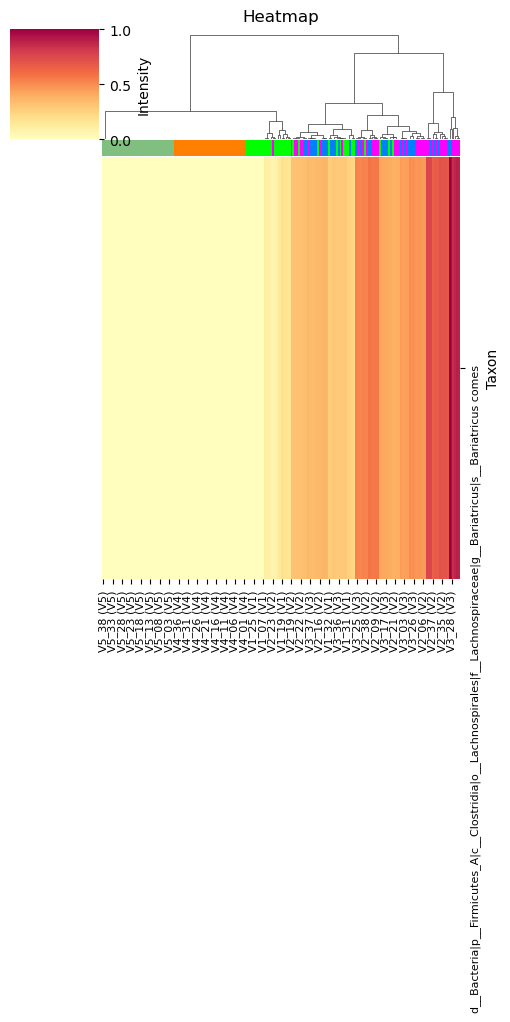

In [6]:
HeatmapPlot(sw).plot_basic_heatmap(df1, title = 'Heatmap',fig_size=(10,10), scale=0, row_cluster=False)

In [7]:
taxon = 'd__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum'
function = 'GH20'
sw.get_intensity_matrix(taxon_name=taxon)


V1_01   V1_02   V1_03  \
eggNOG_OGs                                                                   
COG0052@1|root,COG0052@2|Bacteria,2GMYC@201174|...       0       0       0   
COG0172@1|root,COG0172@2|Bacteria,2GIWP@201174|...       0  611773       0   
COG0198@1|root,COG0198@2|Bacteria,2IKP2@201174|...       0       0       0   
COG1454@1|root,COG1454@2|Bacteria,2I2FD@201174|...       0       0       0   
COG1841@1|root,COG1841@2|Bacteria,2GQV0@201174|...       0       0       0   
COG3957@1|root,COG3957@2|Bacteria,2GN27@201174|...  397145  462020  475848   
COG4166@1|root,COG4166@2|Bacteria,2GIUH@201174|...       0       0  233362   

                                                     V1_04    V1_05   V1_06  \
eggNOG_OGs                                                                    
COG0052@1|root,COG0052@2|Bacteria,2GMYC@201174|...       0        0       0   
COG0172@1|root,COG0172@2|Bacteria,2GIWP@201174|...       0        0       0   
COG0198@1|root,COG0198@2|Bacteria,2IKP2@201174|...  188083  1355989       0   
COG1454@1|root,COG1454@2|Bacteria,2I2FD@201174|...       0        0       0   
COG1841@1|root,COG1841@2|Bacteria,2GQV0@201174|...       0        0       0   
COG3957@1|root,COG3957@2|Bacteria,2GN27@201174|...  222838        0  358138   
COG4166@1|root,COG4166@2|Bacteria,2GIUH@201174|...       0        0       0   

                                                     V1_07   V1_08  V1_09  \
eggNOG_OGs                                                                  
COG0052@1|root,COG0052@2|Bacteria,2GMYC@201174|...       0       0      0   
COG0172@1|root,COG0172@2|Bacteria,2GIWP@201174|...       0       0      0   
COG0198@1|root,COG0198@2|Bacteria,2IKP2@201174|...       0       0      0   
COG1454@1|root,COG1454@2|Bacteria,2I2FD@201174|...       0       0      0   
COG1841@1|root,COG1841@2|Bacteria,2GQV0@201174|...       0       0      0   
COG3957@1|root,COG3957@2|Bacteria,2GN27@201174|...  487869  497563      0   
COG4166@1|root,COG4166@2|Bacteria,2GIUH@201174|...       0   92074      0   

                                                     V1_10  ...  V5_29  \
eggNOG_OGs                                                  ...          
COG0052@1|root,COG0052@2|Bacteria,2GMYC@201174|...       0  ...      0   
COG0172@1|root,COG0172@2|Bacteria,2GIWP@201174|...       0  ...      0   
COG0198@1|root,COG0198@2|Bacteria,2IKP2@201174|...  194397  ...      0   
COG1454@1|root,COG1454@2|Bacteria,2I2FD@201174|...       0  ...      0   
COG1841@1|root,COG1841@2|Bacteria,2GQV0@201174|...       0  ...      0   
COG3957@1|root,COG3957@2|Bacteria,2GN27@201174|...  349183  ...      0   
COG4166@1|root,COG4166@2|Bacteria,2GIUH@201174|...   66242  ...      0   

                                                      V5_30   V5_31  V5_32  \
eggNOG_OGs                                                                   
COG0052@1|root,COG0052@2|Bacteria,2GMYC@201174|...   493901  896480      0   
COG0172@1|root,COG0172@2|Bacteria,2GIWP@201174|...  1159991       0      0   
COG0198@1|root,COG0198@2|Bacteria,2IKP2@201174|...   795840       0      0   
COG1454@1|root,COG1454@2|Bacteria,2I2FD@201174|...        0       0      0   
COG1841@1|root,COG1841@2|Bacteria,2GQV0@201174|...        0       0      0   
COG3957@1|root,COG3957@2|Bacteria,2GN27@201174|...        0       0      0   
COG4166@1|root,COG4166@2|Bacteria,2GIUH@201174|...        0       0      0   

                                                      V5_33    V5_34    V5_35  \
eggNOG_OGs                                                                      
COG0052@1|root,COG0052@2|Bacteria,2GMYC@201174|...   472630  1161726        0   
COG0172@1|root,COG0172@2|Bacteria,2GIWP@201174|...        0        0        0   
COG0198@1|root,COG0198@2|Bacteria,2IKP2@201174|...  1125689   630949  1492873   
COG1454@1|root,COG1454@2|Bacteria,2I2FD@201174|...        0   483536        0   
COG1841@1|root,COG1841@2|Bacteria,2GQV0@201174|...        0        0        0   
COG3957

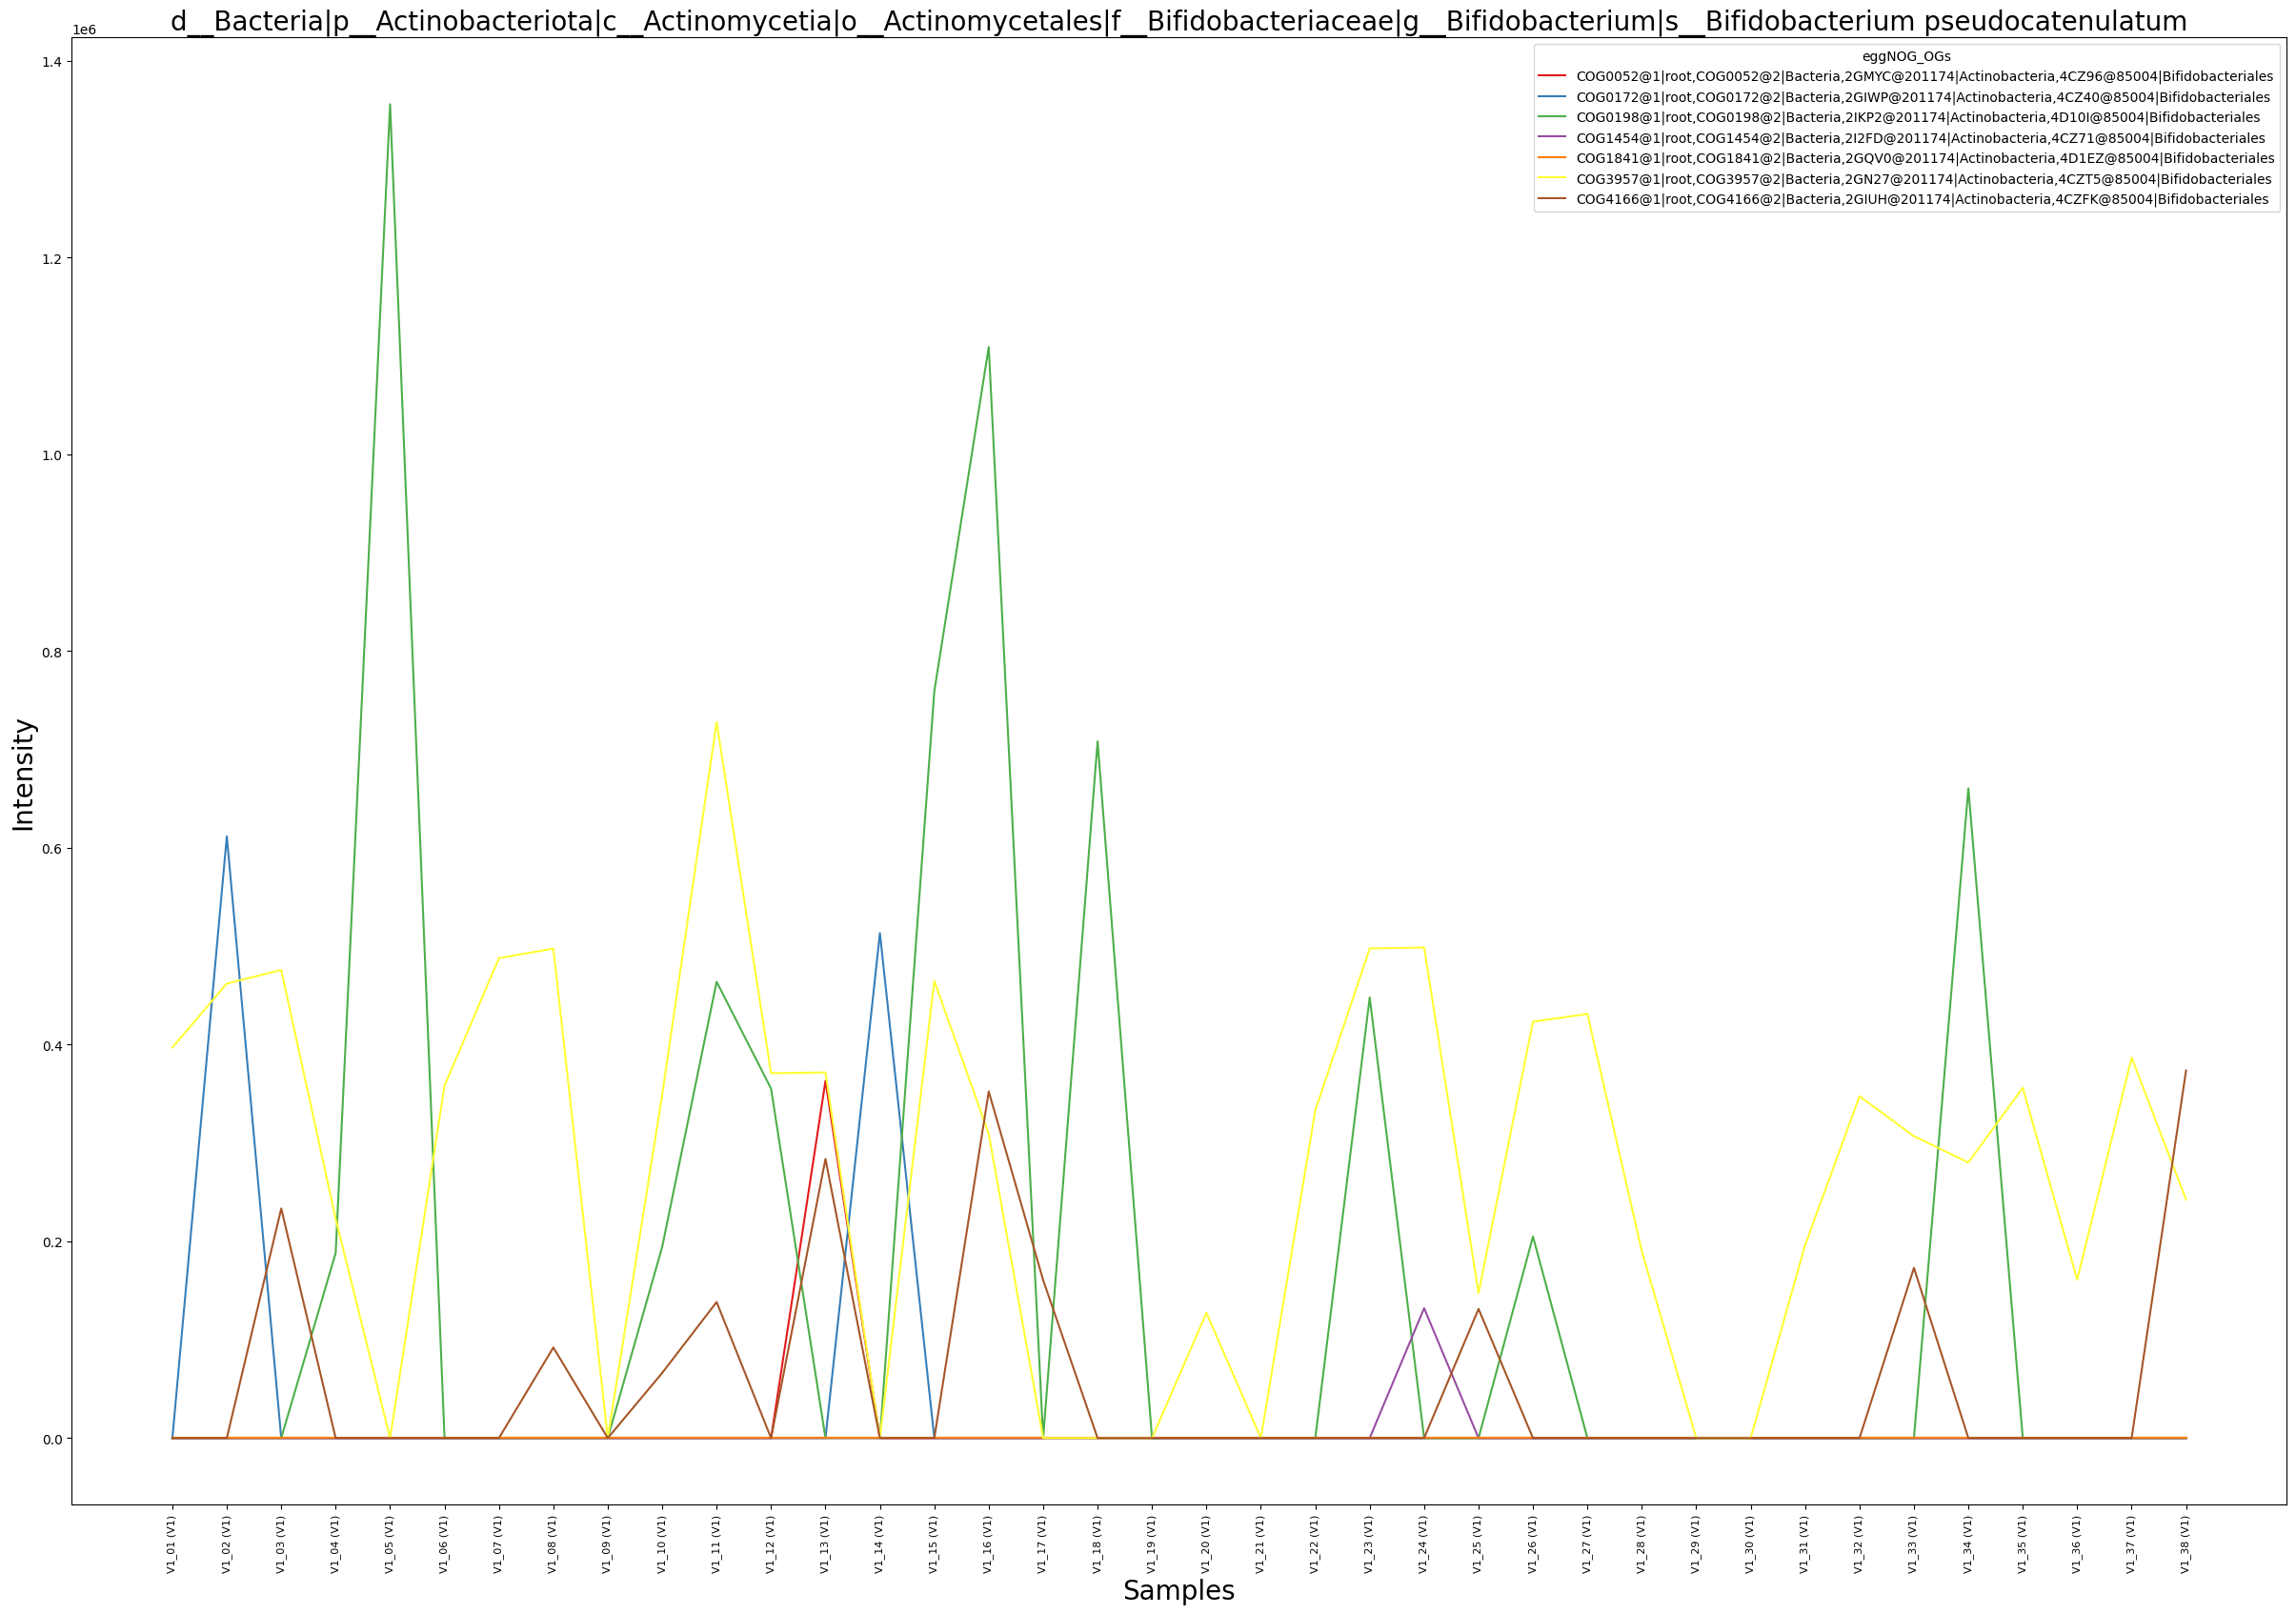

<Axes: title={'center': 'd__Bacteria|p__Actinobacteriota|c__Actinomycetia|o__Actinomycetales|f__Bifidobacteriaceae|g__Bifidobacterium|s__Bifidobacterium pseudocatenulatum'}, xlabel='Samples', ylabel='Intensity'>

In [9]:
LinePlot(sw).plot_intensity_line(taxon_name=taxon, fig_size=(30,20), groups=['V1'])

Table size: 7 x 190
Recommended figure size: width: 40, length: 12, front_title: 20, font_size: 10


<Figure size 4000x1200 with 0 Axes>

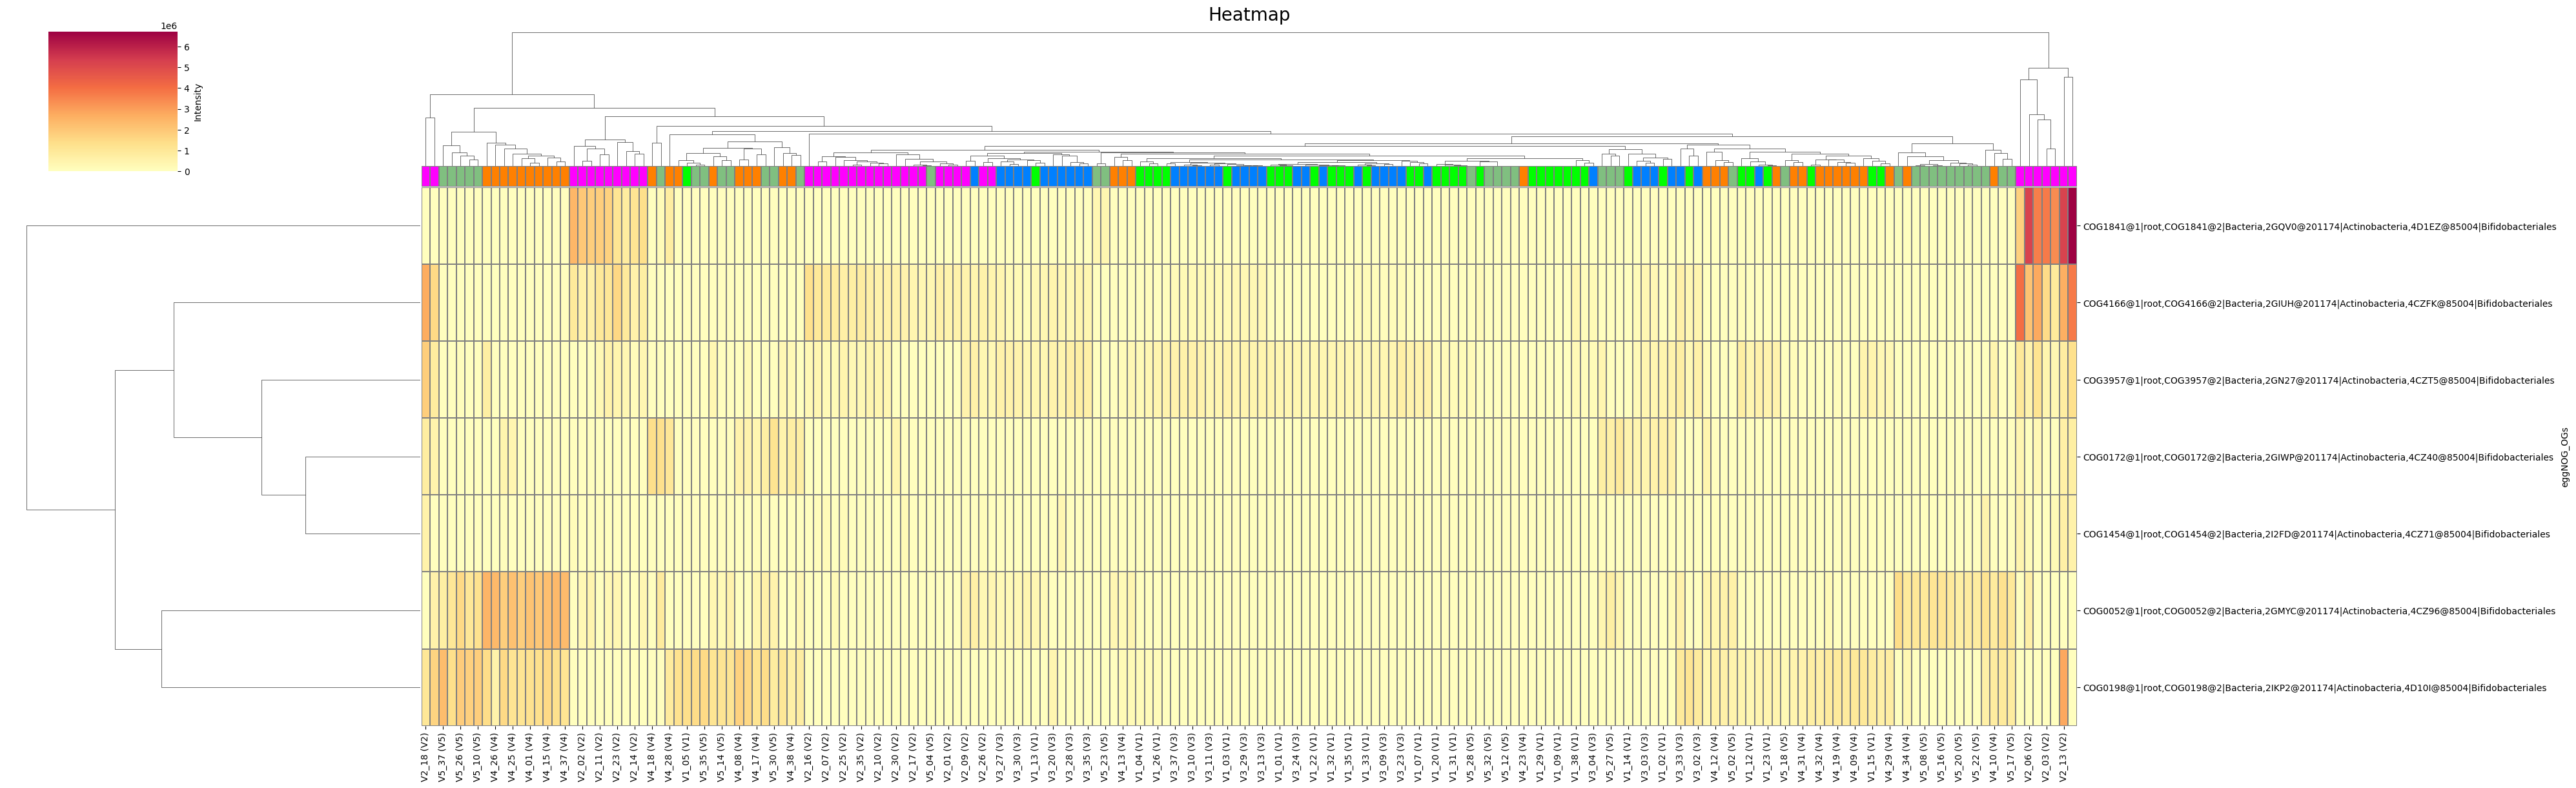

In [10]:
HeatmapPlot(sw).plot_basic_heatmap(mat=sw.get_intensity_matrix(taxon_name=taxon))

# 2. Basic stastiscal and plot

- calculates the number of peptides in each taxonomic group

In [7]:
sw.get_stats_peptide_num_in_taxa()

LCA_level  count   freq             label
0   unknown      0   0.00    unknown (0.0%)
1      life      5   0.25      life (0.25%)
2    domain    163   8.15    domain (8.15%)
3    phylum     12   0.60     phylum (0.6%)
4     class    100   5.00      class (5.0%)
5     order     87   4.35     order (4.35%)
6    family    351  17.56   family (17.56%)
7     genus    455  22.76    genus (22.76%)
8   species    826  41.32  species (41.32%)

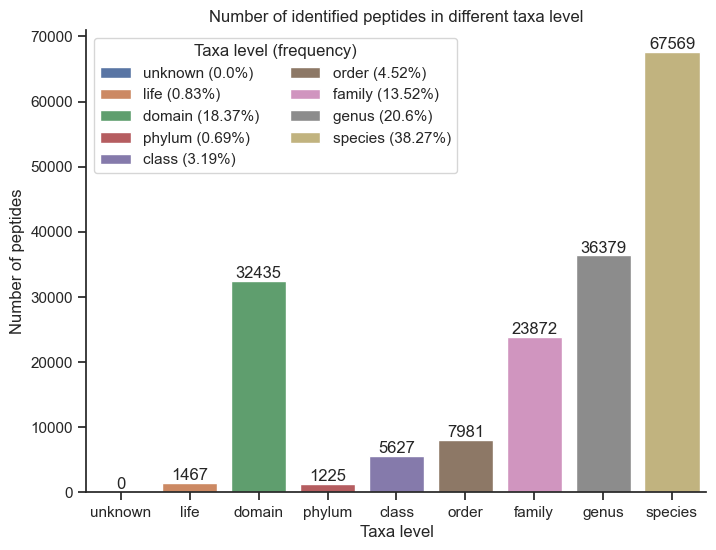

In [7]:
bp = BasicPlot(sw)
bp.plot_taxa_stats()

- Calculating the number of species classification

In [19]:
sw.get_stats_taxa_level()

taxa_level  count
0     domain      2
1     phylum     21
2      class     26
3      order     70
4     family    159
5      genus    631
6    species   1198

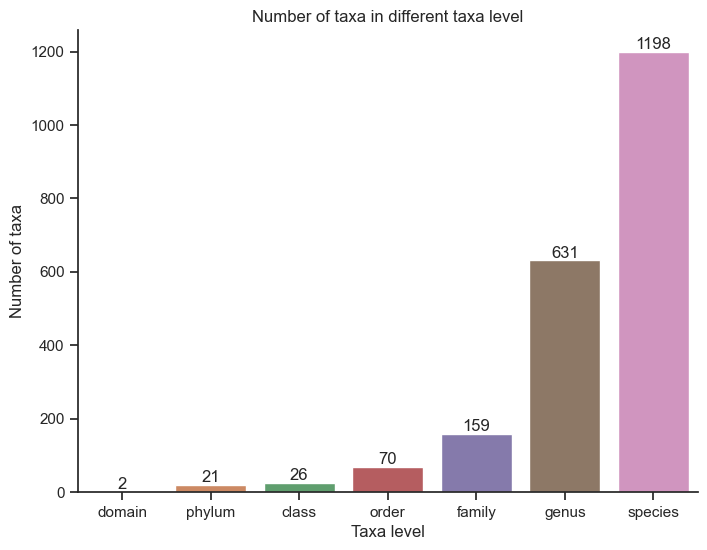

In [9]:
bp.plot_taxa_number()

- Calculate the number and distribution of the selected functional proportion.

In [10]:
sw.get_stats_func_prop()

prop       n   freq            label
0     0-0.1       0   0.00     0-0.1 (0.0%)
1     0-0.2       0   0.00     0-0.2 (0.0%)
2     0-0.3       0   0.00     0-0.3 (0.0%)
3     0-0.4       4   0.00     0-0.4 (0.0%)
4     0-0.5       7   0.00     0-0.5 (0.0%)
5   0.5-0.6     198   0.11  0.5-0.6 (0.11%)
6   0.6-0.7     199   0.11  0.6-0.7 (0.11%)
7   0.7-0.8     218   0.12  0.7-0.8 (0.12%)
8   0.8-0.9     663   0.38  0.8-0.9 (0.38%)
9     0.9-1    4444   2.52    0.9-1 (2.52%)
10        1  170822  96.75       1 (96.75%)

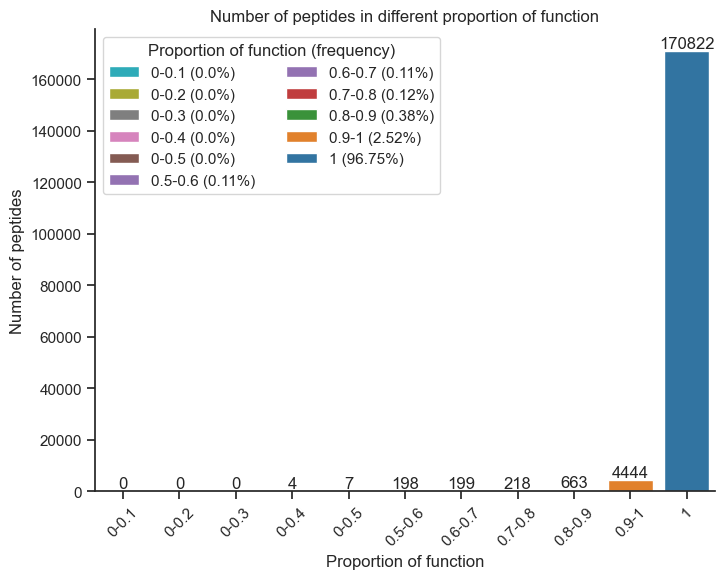

In [11]:
bp.plot_prop_stats()

- Plot PCA of a table (function, taxa or taxa-func)
- `show_label`: Whether to show text labels for each point

In [12]:
sw.taxa_df

V1_01     V1_02  \
Taxon                                                                    
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...    849272    769579   
d__Archaea|p__Methanobacteriota|c__Methanobacte...         0         0   
d__Archaea|p__Methanobacteriota|c__Methanobacte...  35091871  10216429   
d__Archaea|p__Thermoplasmatota|c__Thermoplasmat...    109488    656168   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...         0    657038   
...                                                      ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...   1316600    987724   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...         0   2354472   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  23989791  17522593   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  10501555  11819989   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...         0         0   

                                                       V1_03     V1_04  \
Taxon                                                                    
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...   1073000    893715   
d__Archaea|p__Methanobacteriota|c__Methanobacte...         0         0   
d__Archaea|p__Methanobacteriota|c__Methanobacte...  12405536  12106774   
d__Archaea|p__Thermoplasmatota|c__Thermoplasmat...    691722    284908   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...         0         0   
...                                                      ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...    690507    677241   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   4182023         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  12939956  21282901   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   6109554   6445925   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...         0         0   

                                                       V1_05     V1_06  \
Taxon                                                                    
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...    996727   1262026   
d__Archaea|p__Methanobacteriota|c__Methanobacte...         0         0   
d__Archaea|p__Methanobacteriota|c__Methanobacte...  24949345  14404311   
d__Archaea|p__Thermoplasmatota|c__Thermoplasmat...    177372    185183   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...         0         0   
...                                                      ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...   1157322         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   1423278   1643794   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  14082286  12273849   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   6918447  16998552   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   2889479   2509861   

                                                       V1_07     V1_08  \
Taxon                                                                    
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...    774126    425760   
d__Archaea|p__Methanobacteriota|c__Methanobacte...         0         0   
d__Archaea|p__Methanobacteriota|c__Methanobacte...  17023279  42841109   
d__Archaea|p__Thermoplasmatota|c__Thermoplasmat...    495046    349168   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...         0         0   
...                                                      ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...    630042    304885   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   6266517         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  30439796  19413548   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   7503023  10197813   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...         0         0   

                                                       V1_09     V1_10  ...  \
Taxon                                                                   ...   
d__Archaea|p__Halobacteriota|c__Halobacteria|

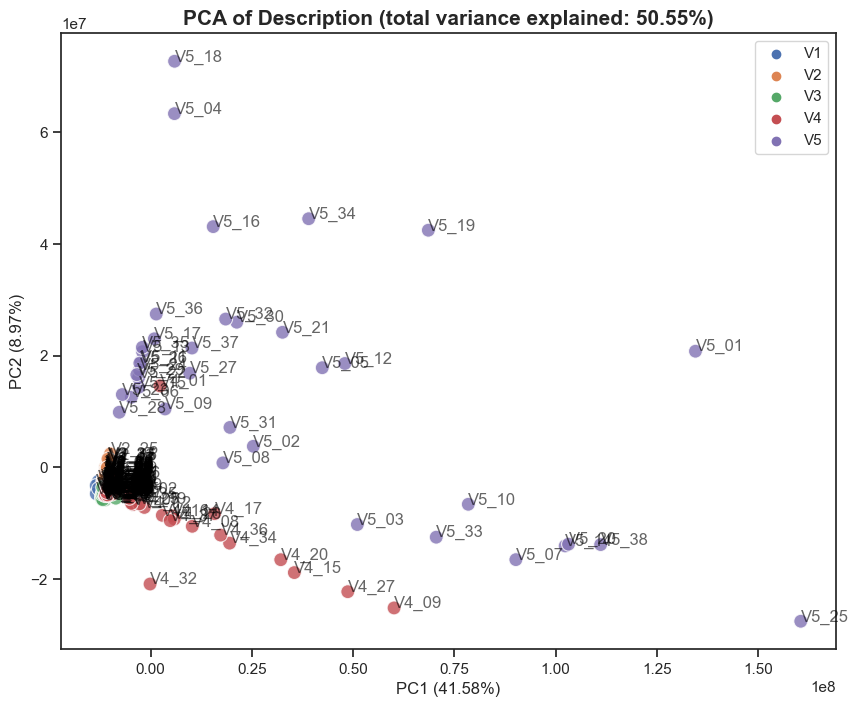

<Axes: title={'center': 'PCA of Description (total variance explained: 50.55%)'}, xlabel='PC1 (41.58%)', ylabel='PC2 (8.97%)'>

In [14]:
bp.plot_pca_sns(sw.clean_df, 'Description', show_label=True)

# 3. Difference Analysis

## 3.1 ANOVA TEST

- Calculate ANOVA for all groups

In [8]:
df_anova = sw.get_stats_anova()

ANOVA test for Taxon-eggNOG_OGs in ['V1', 'V2', 'V3', 'V4', 'V5']


100%|██████████| 697/697 [00:02<00:00, 297.22it/s]


- Display the ANOVA result sorted by P-value

In [9]:
display(df_anova.sort_values(by='P-value'))

P-value  \
Taxon                                              eggNOG_OGs                                                          
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG1344@1|root,COG1344@2|Bacteria,1TP1K@1239|Fi...  1.260860e-100   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG0811@1|root,COG0811@2|Bacteria,4NEA2@976|Bac...   7.986966e-84   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG1629@1|root,COG1629@2|Bacteria,COG4771@2|Bac...   4.687317e-83   
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_... COG4770@1|root,COG4770@2|Bacteria,1VA1E@1239|Fi...   2.613310e-80   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0057@1|root,COG0057@2|Bacteria,1TNYU@1239|Fi...   7.321924e-77   
...                                                                                                              ...   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0183@1|root,COG0183@2|Bacteria,1TP07@1239|Fi...   7.680643e-01   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG1629@1|root,COG1629@2|Bacteria,COG4771@2|Bac...   8.019231e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0427@1|root,COG0427@2|Bacteria,1TPHC@1239|Fi...   8.419723e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG0552@1|root,COG0552@2|Bacteria,1TPRI@1239|Fi...   9.205646e-01   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG2160@1|root,COG2160@2|Bacteria,1TPXC@1239|Fi...   9.464831e-01   

                                                                                                       f-statistic  \
Taxon                                              eggNOG_OGs                                                        
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG1344@1|root,COG1344@2|Bacteria,1TP1K@1239|Fi...   537.231624   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG0811@1|root,COG0811@2|Bacteria,4NEA2@976|Bac...   337.611476   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG1629@1|root,COG1629@2|Bacteria,COG4771@2|Bac...   330.326881   
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_... COG4770@1|root,COG4770@2|Bacteria,1VA1E@1239|Fi...   305.406007   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0057@1|root,COG0057@2|Bacteria,1TNYU@1239|Fi...   276.439634   
...                                                                                                            ...   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0183@1|root,COG0183@2|Bacteria,1TP07@1239|Fi...     0.455821   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG1629@1|root,COG1629@2|Bacteria,COG4771@2|Bac...     0.409138   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0427@1|root,COG0427@2|Bacteria,1TPHC@1239|Fi...     0.352638   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG0552@1|root,COG0552@2|Bacteria,1TPRI@1239|Fi...     0.231239   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG2160@1|root,COG2160@2|Bacteria,1TPXC@1239|Fi...     0.184029   

                                                                                                         V1_01  \
Taxon                                              eggNOG_OGs                                                    
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... COG1344@1|root,COG1344@2|Bacteria,1TP1K@1239|Fi...   490970   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG0811@1|root,COG0811@2|Bacteria,4NEA2@976|Bac...        0   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... COG1629@1|root,COG1629@2|Bacteria,COG4771@2|Bac...   781296   
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_... COG4770@1|root,COG4770@2|Bacteria,1VA1E@1239|Fi...        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0057@1|root,COG0057@2|Bacteria,1TNYU@1239|Fi...  2590233   
...                                                                                                        ...   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... COG0183@1|root,COG0183@2|Bacteria,1TP07@1239|Fi...

- plot taxa-function across heatmap

Top 200, f-statistical, fig size: 30*30

Table size: 377 x 192
Recommended figure size: width: 40, length: 40, front_title: 20, font_size: 10


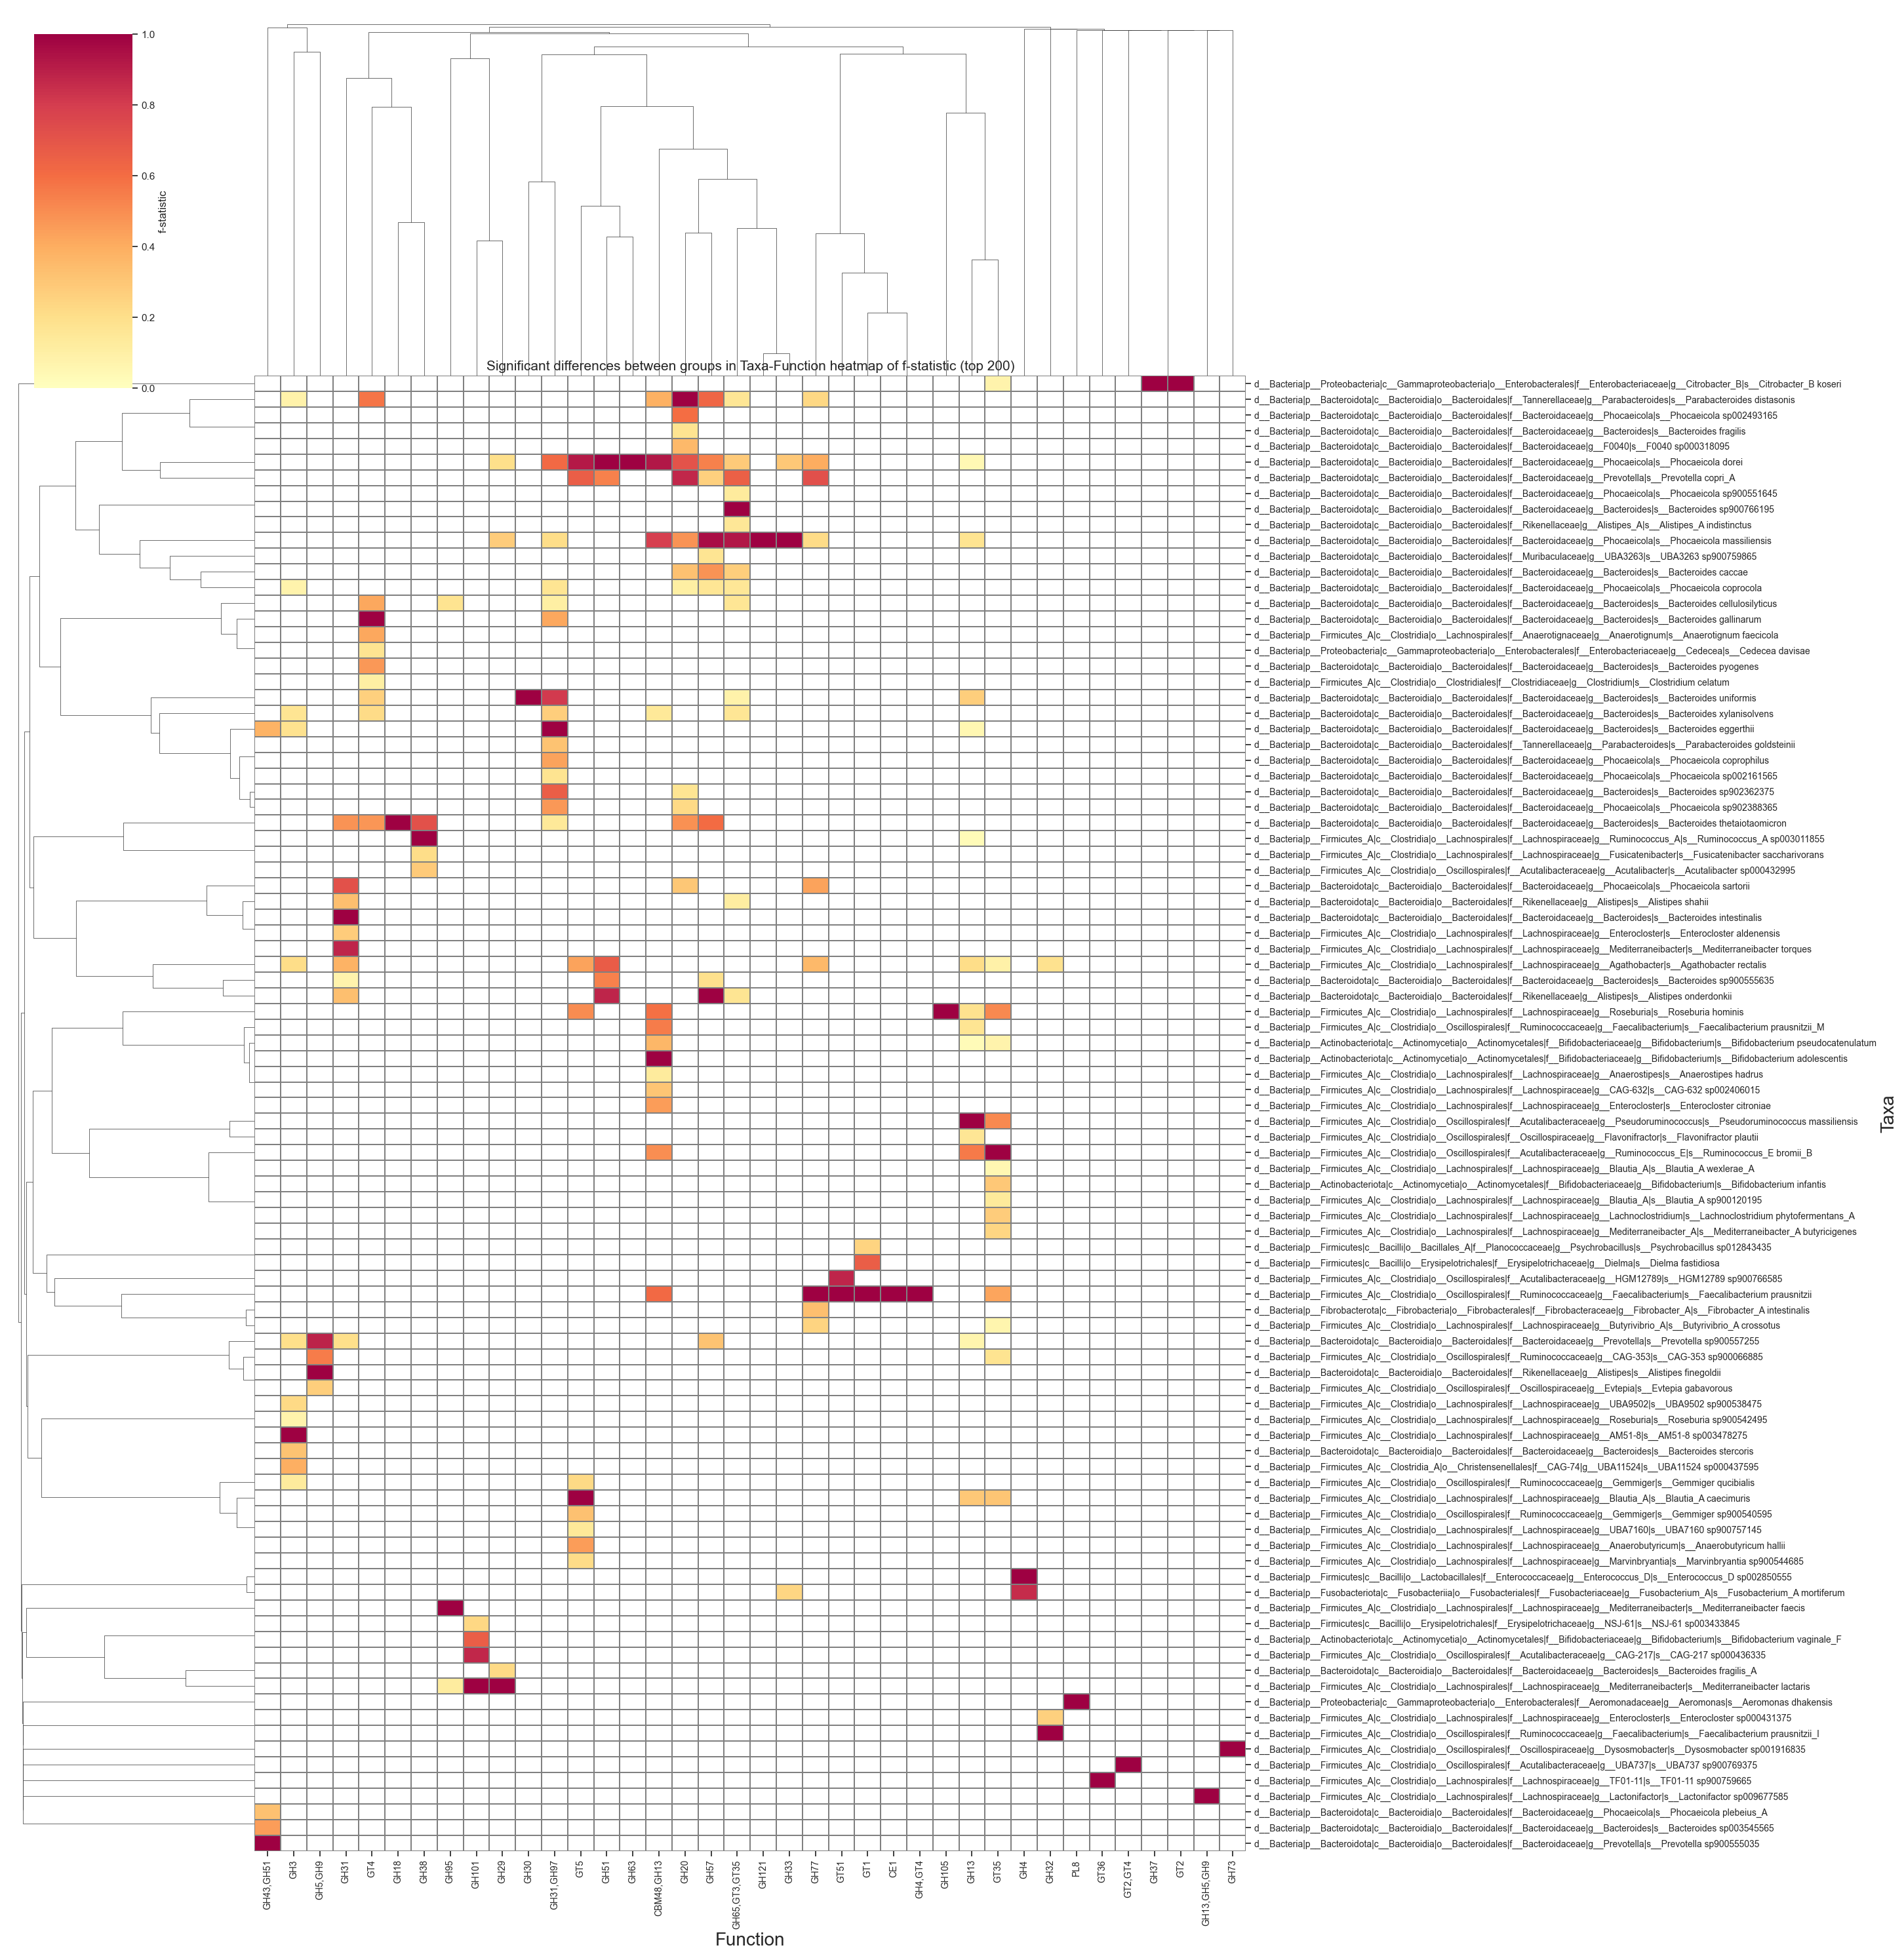

In [16]:
hp = HeatmapPlot(sw)
hp.plot_top_taxa_func_heatmap_of_test_res(df_anova, sw.func, 200, 'f', (30,30))

Top 100, p-value, auto figsize

Table size: 377 x 192
Recommended figure size: width: 40, length: 40, front_title: 20, font_size: 10


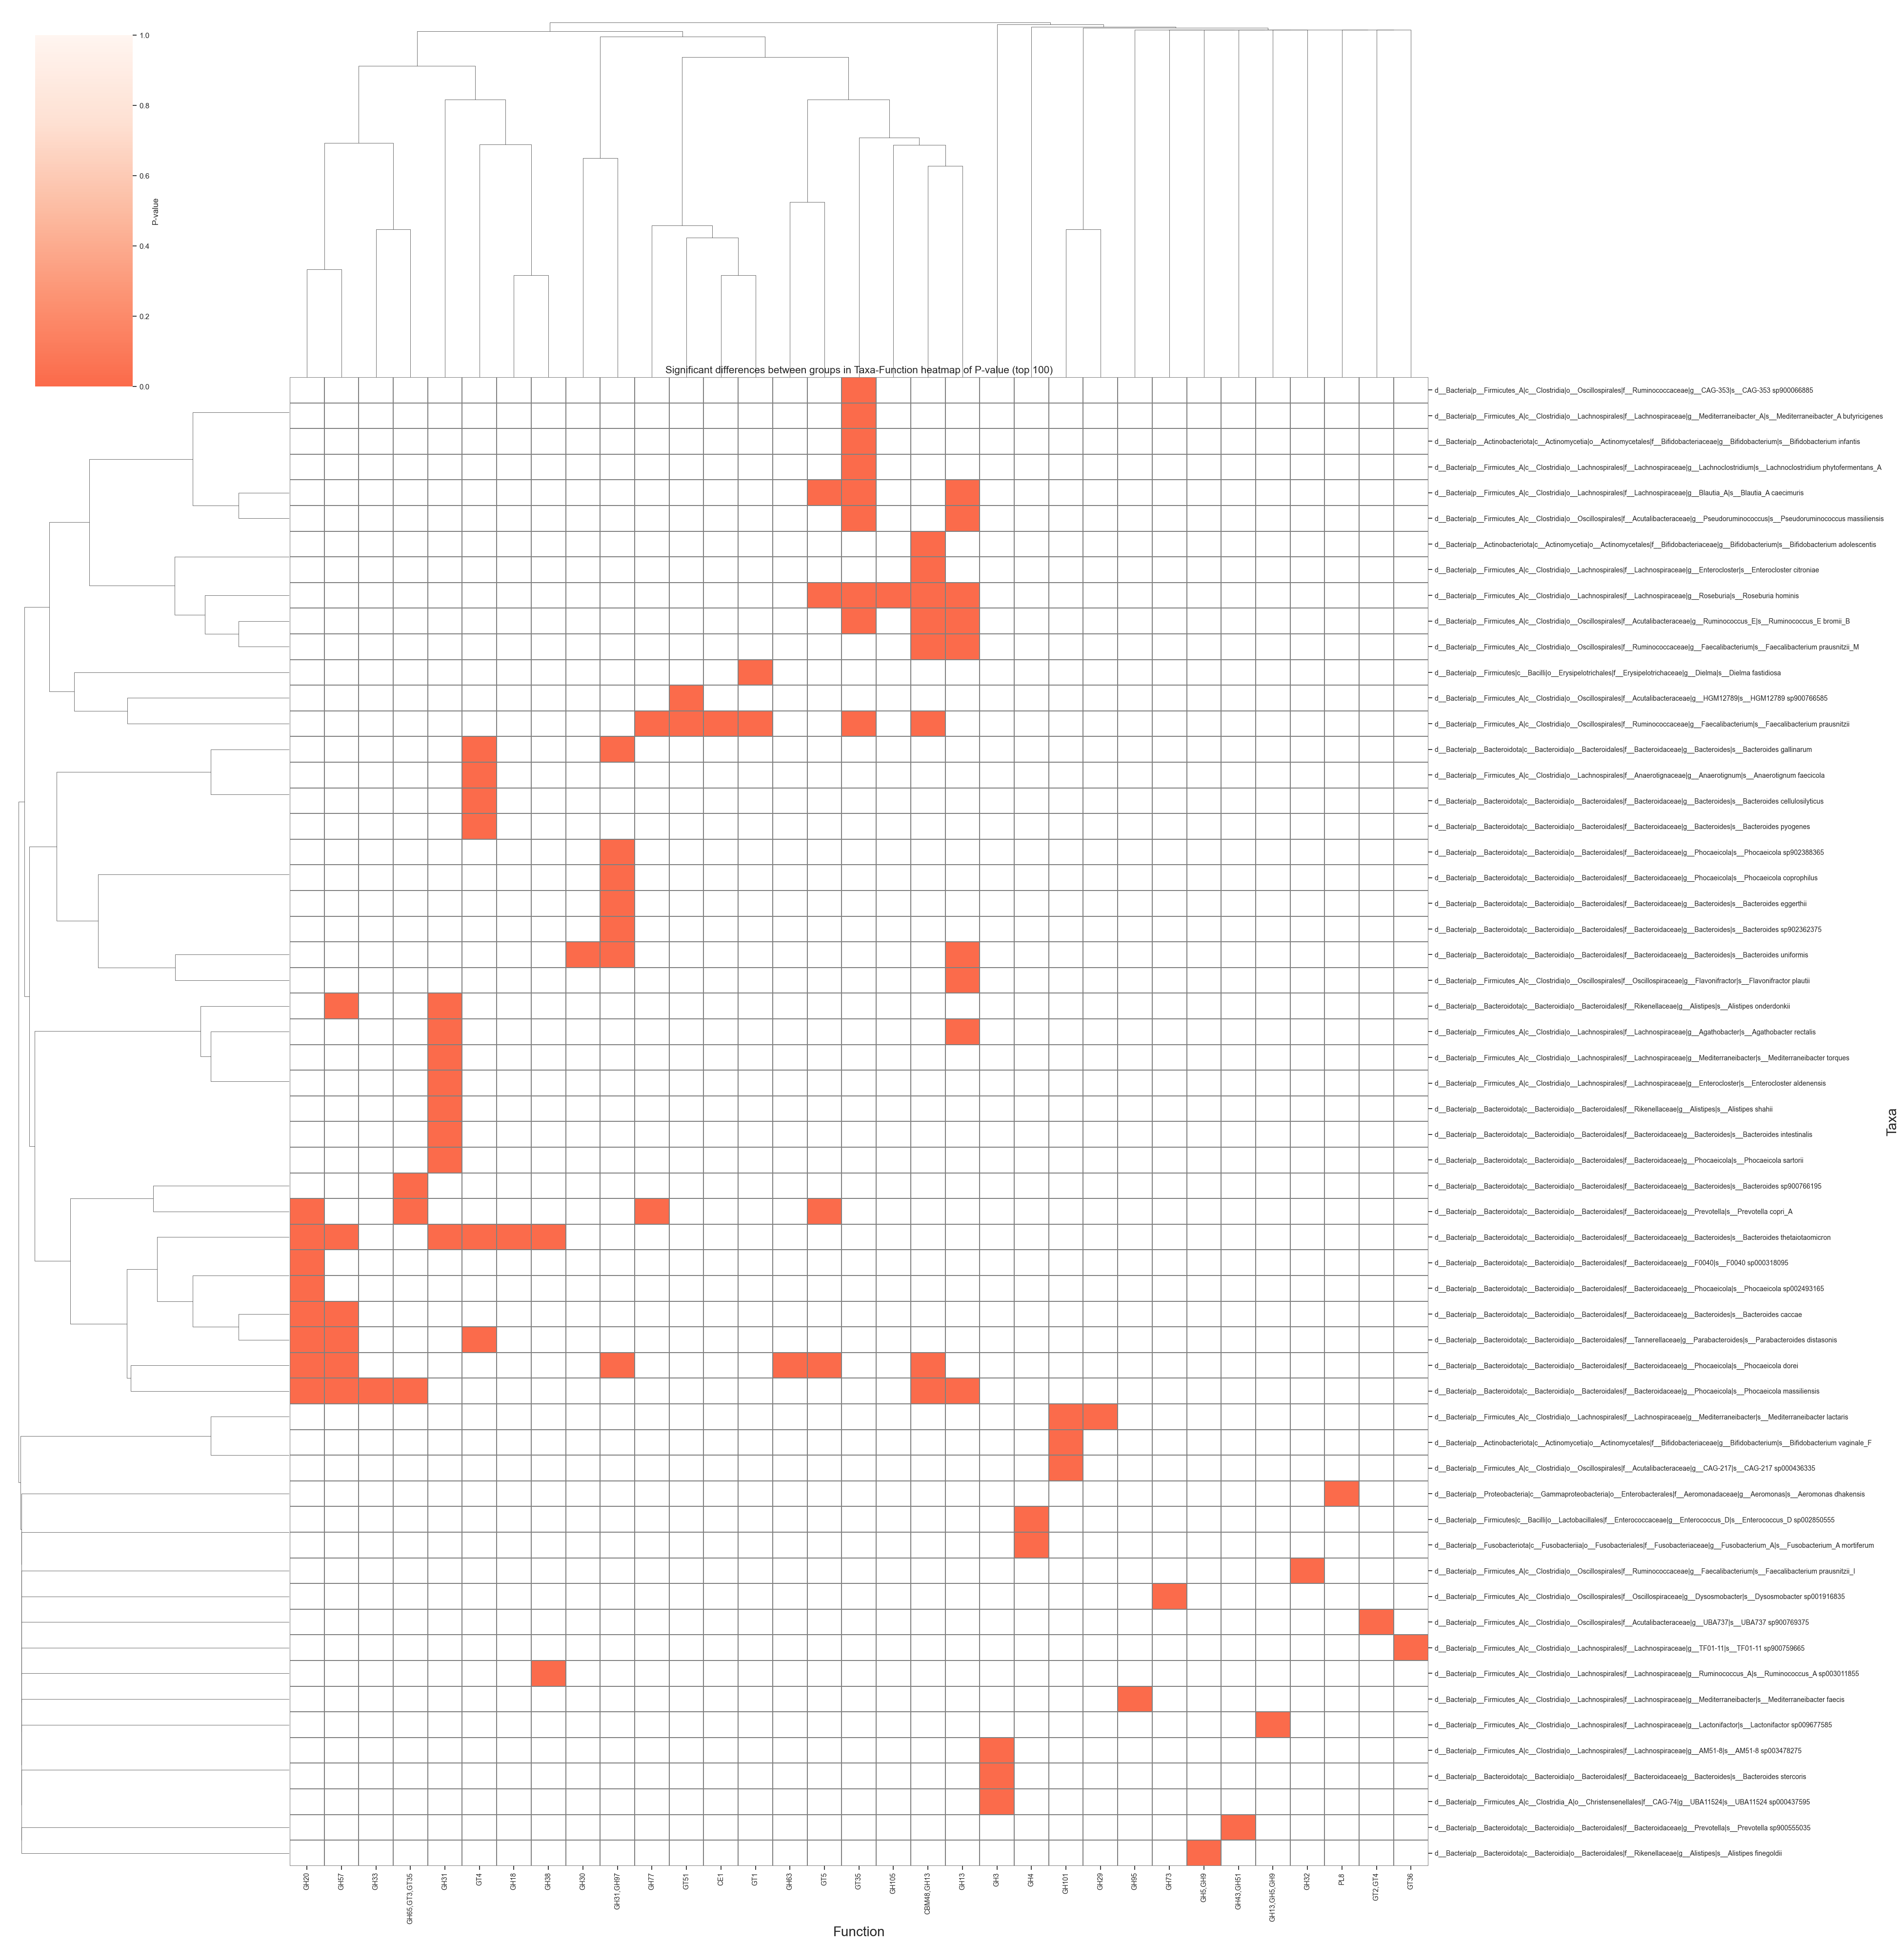

In [17]:
hp.plot_top_taxa_func_heatmap_of_test_res(df_anova, sw.func, 100, 'p')

## 3.2 TUKEY TEST

- Select species and functions of interest for TUKEY testing

In [18]:
taxon = 'd__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A wexlerae_A'
function = 'Alpha amylase catalytic'
df_tukey = sw.get_stats_tukey_test(taxon_name=taxon, func_name=function)

IndexError: index 0 is out of bounds for axis 0 with size 0

- plot tukey result

<Axes: title={'center': 'The Tukey test result'}, xlabel='The difference of mean value', ylabel='Groups'>

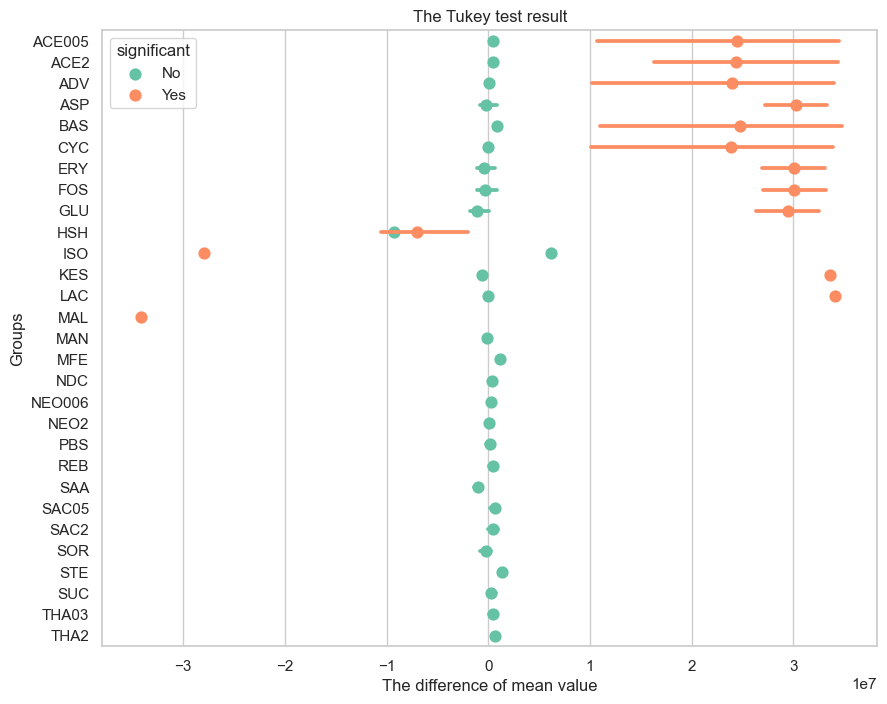

In [17]:
tp = TukeyPlot()
tp.plot_tukey(df_tukey)

## 3.3 T-Test

- Select the two groups of interest for the T-test

In [18]:
df_ttest = sw.get_stats_ttest(group_list=['MAL', 'PBS'])
display(df_ttest.sort_values(by='P-value'))

t-test for Taxon-Description in ['MAL', 'PBS']


100%|██████████| 20739/20739 [00:33<00:00, 614.41it/s]


P-value  \
Taxon                                              Description                                                        
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the bacterial ribosomal protein bS16...  6.530428e-11   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the phosphoglycerate kinase family       1.422027e-10   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cell wall binding repeat                   5.536336e-10   
                                                   Bacterial extracellular solute-binding protein      6.026885e-10   
                                                   Psort location Cytoplasmic, score 9.98              8.880045e-09   
...                                                                                                             ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Oxidoreductase required for the transfer of ele...           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Glycoside hydrolase, family 20, catalytic core               NaN   
                                                   May play a key role in the regulation of the in...           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Binds to 23S rRNA. Forms part of two intersubun...           NaN   
                                                   Pyruvate phosphate dikinase, PEP/pyruvate bindi...           NaN   

                                                                                                       t-statistic  \
Taxon                                              Description                                                       
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the bacterial ribosomal protein bS16...    13.604118   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the phosphoglycerate kinase family         12.974279   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cell wall binding repeat                     11.931107   
                                                   Bacterial extracellular solute-binding protein        11.868243   
                                                   Psort location Cytoplasmic, score 9.98                10.003715   
...                                                                                                            ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Oxidoreductase required for the transfer of ele...          NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Glycoside hydrolase, family 20, catalytic core              NaN   
                                                   May play a key role in the regulation of the in...          NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Binds to 23S rRNA. Forms part of two intersubun...          NaN   
                                                   Pyruvate phosphate dikinase, PEP/pyruvate bindi...          NaN   

                                                                                                          V1_32  \
Taxon                                              Description                                                    
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the bacterial ribosomal protein bS16...   3405147   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the phosphoglycerate kinase family       10544927   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cell wall binding repeat                    4024996   
                                                   Bacterial extracellular solute-binding protein      55357633   
                                                   Psort location Cytoplasmic, score 9.98              33008066   
...                                                                                                         ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Oxidoreductase required for the transfer of ele...    

- Plot top 100 taxa-function across heatmap (p-value)

Table size: 20739 x 22
Recommended figure size: width: 27, length: 40, front_title: 20, font_size: 10


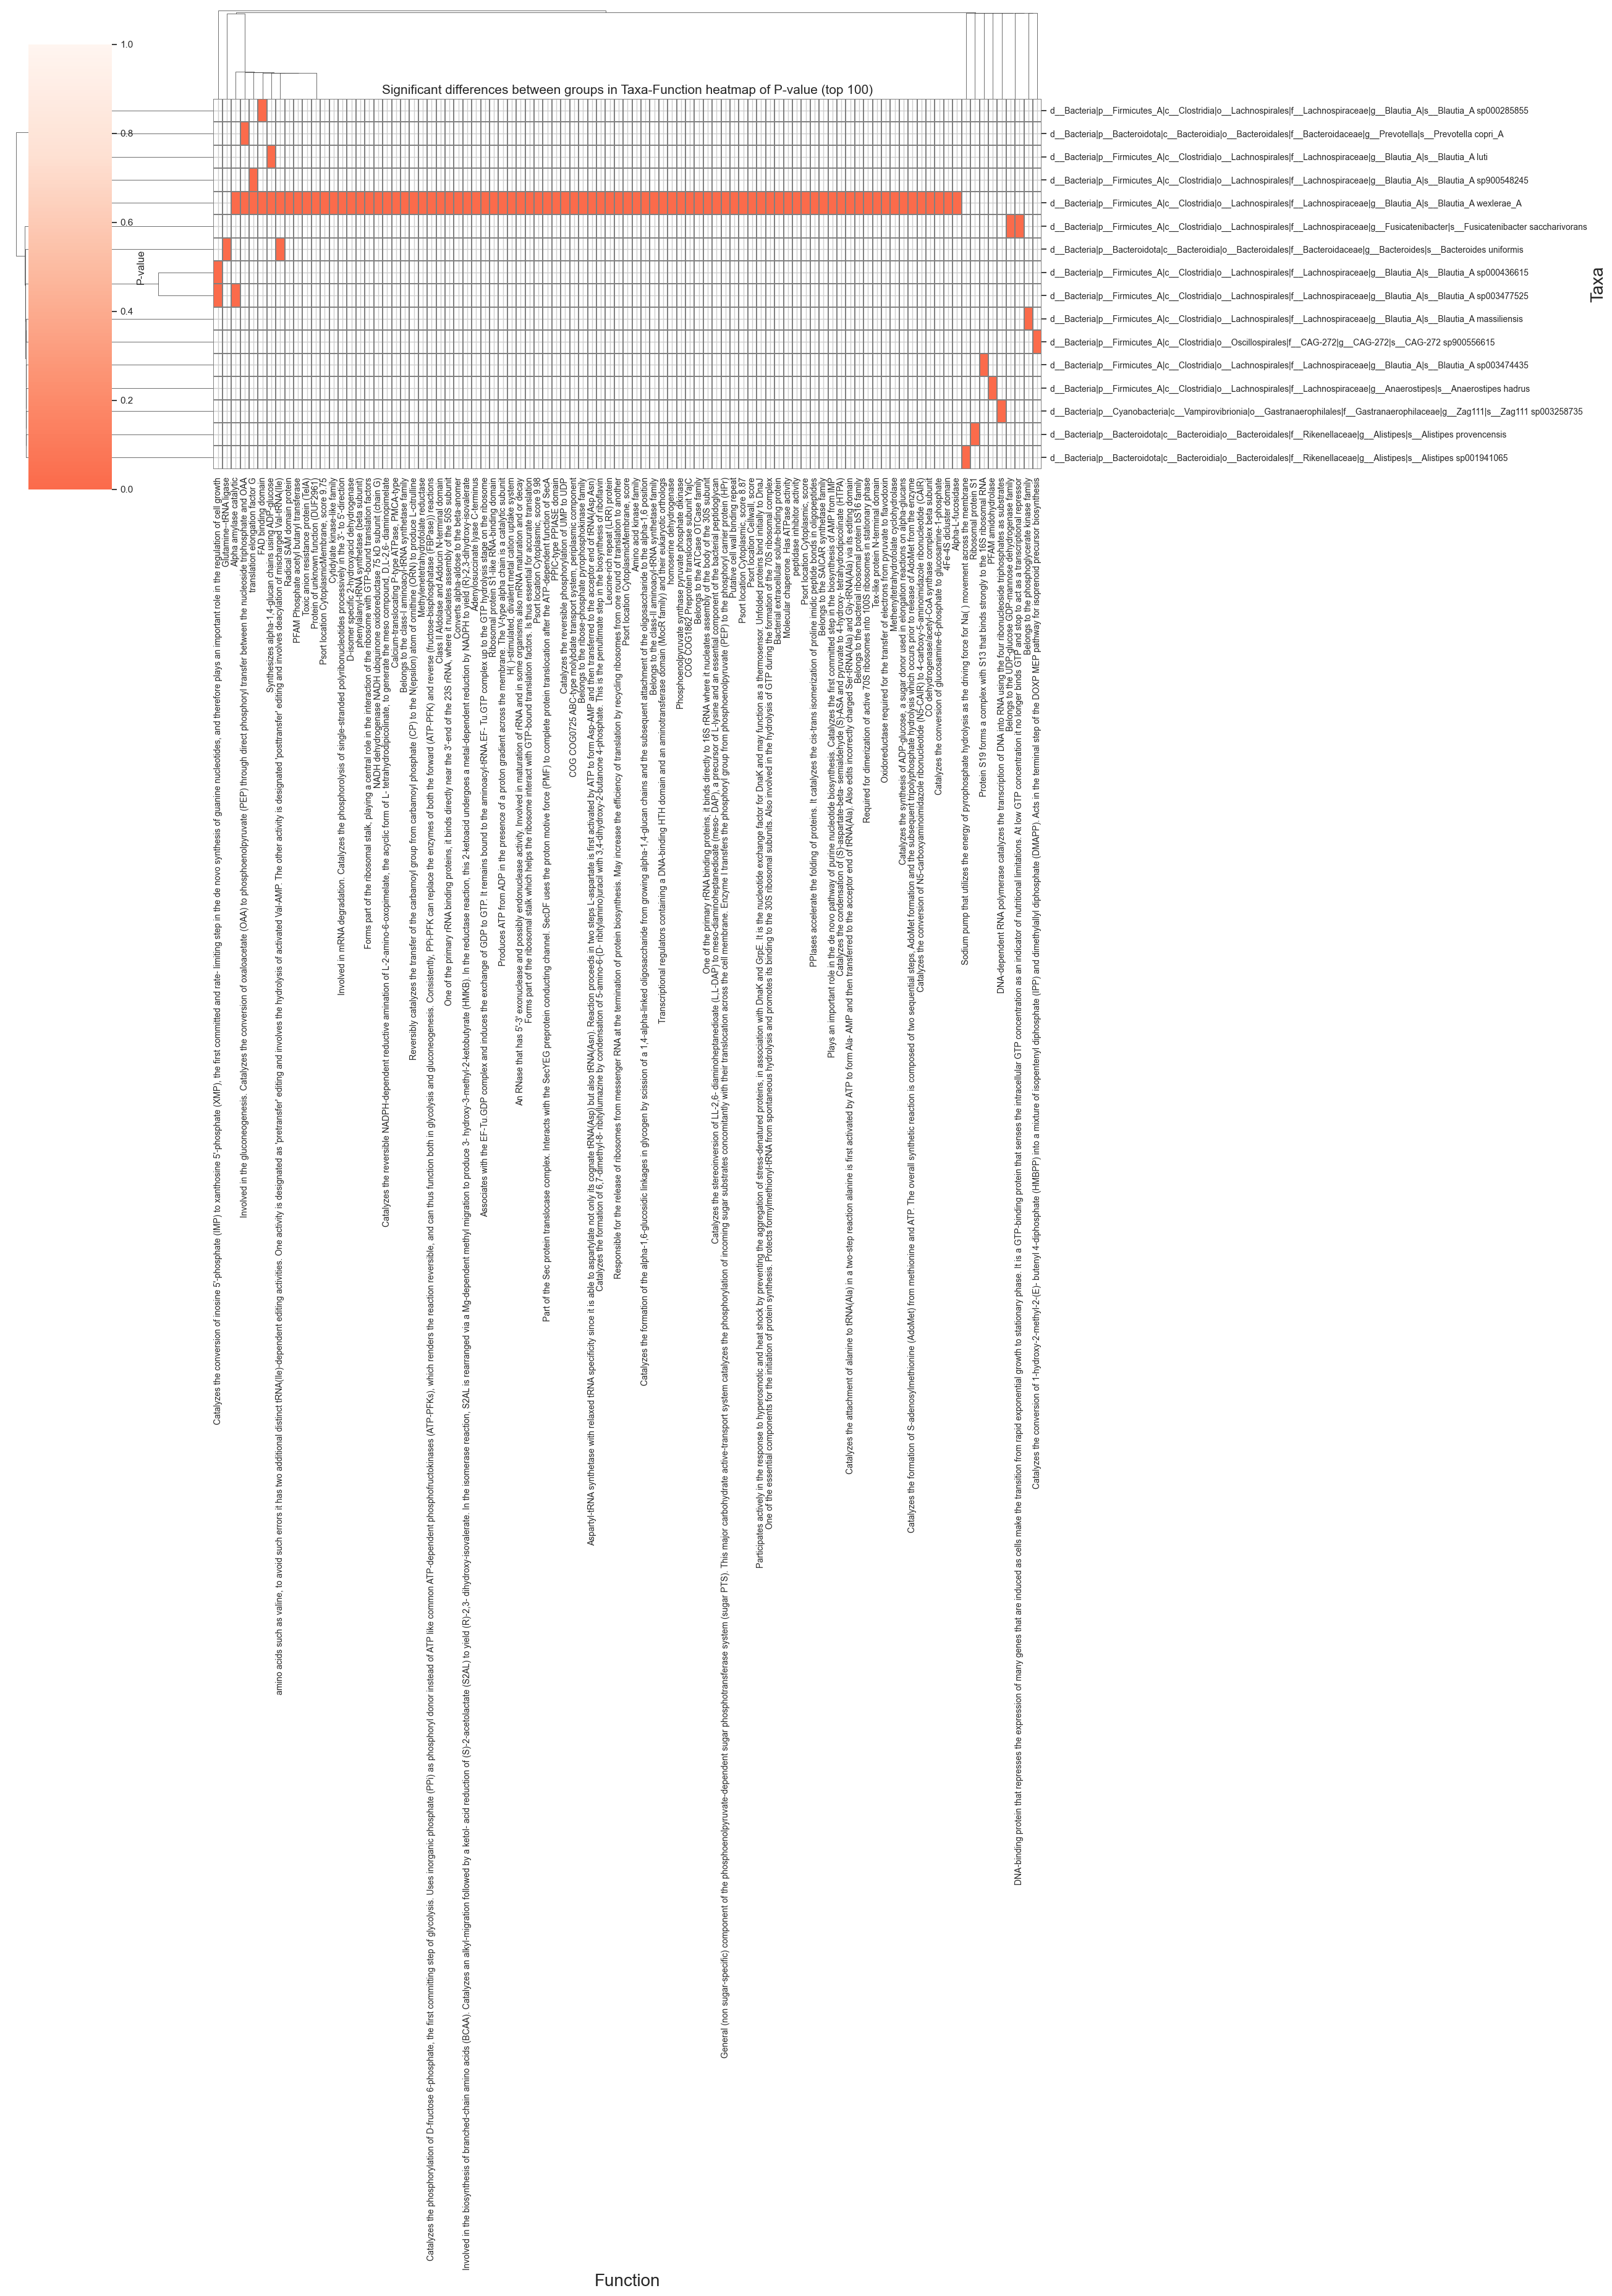

In [19]:
hp.plot_top_taxa_func_heatmap_of_test_res(df_ttest, sw.func, 100, 'p')

## 3.4 DESeq2 for Log2FC

- Select the two groups of interest for calculating log2FC

In [11]:
df_fc = sw.get_stats_deseq2(sw.taxa_func_df , group_list=['V1', 'V2'])

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.23 seconds.

Fitting dispersion trend curve...
... done in 0.19 seconds.

Fitting MAP dispersions...
... done in 0.21 seconds.

Fitting LFCs...
... done in 0.61 seconds.

Refitting 218 outliers.

Fitting dispersions...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.05 seconds.

Fitting LFCs...
... done in 0.15 seconds.

Running Wald tests...
... done in 0.18 seconds.

Log2 fold change & Wald test p-value: Person V2 vs V1


baseMean  \
Taxa-Func                                                          
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   1067.079823   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...    790.263040   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...     36.539059   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   6152.813639   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...    567.416605   
...                                                          ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   2928.981425   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...    608.013689   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  11789.704250   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   2877.379317   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...   4326.977089   

                                                    log2FoldChange     lfcSE  \
Taxa-Func                                                                      
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...      -17.314439  0.000000   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...       21.291561  9.977112   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...        7.845509  2.918052   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...        2.193153  0.872484   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...        3.653326  2.498929   
...                                                            ...       ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      -15.034348  0.785536   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...       19.173382  0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...        2.468341  1.220340   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      -17.445273  0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...       -4.734423  0.989837   

                                                         stat        pvalue  \
Taxa-Func                                                                     
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   0.000000           NaN   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.134040  3.283947e-02   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.688612  7.174981e-03   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   2.513688  1.194760e-02   
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...   1.461957  1.437530e-01   
...                                                       ...           ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac... -19.138956  1.196430e-81   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   0.000000           NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   2.022666  4.310760e-02   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...   0.000000           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...  -4.783035  1.726680e-06   

                                                            padj  
Taxa-Func                                                         
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...           NaN  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  6.635744e-02  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  1.736914e-02  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.782084e-02  
d__Bacteria|p__Actinobacteriota|c__Actinomyceti...  2.358901e-01  
...                                                          ...  
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  2.543715e-80  
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...           NaN  
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...  8.534258e-02  
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...           NaN  
d__Bacteria|p__Verrucomicrobiota|c__Lentisphaer...  7.675877e-06  

[697 rows x 6 columns]

- Show the DESeq2 result table sorted by `padj` and `log2FoldChange`

In [12]:
display(df_fc.sort_values(by=['padj', 'log2FoldChange']))

baseMean  \
Taxa-Func                                                          
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_...  40815.254437   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  60035.587548   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  28469.886371   
d__Bacteria|p__Firmicutes_A|c__Clostridia_A|o__...   9630.270093   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...   9370.887063   
...                                                          ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      0.000000   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...      0.000000   

                                                    log2FoldChange     lfcSE  \
Taxa-Func                                                                      
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_...       18.676696  0.568078   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...      -19.391700  0.599438   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...       18.157025  0.580393   
d__Bacteria|p__Firmicutes_A|c__Clostridia_A|o__...      -16.751520  0.570571   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...      -16.712128  0.569247   
...                                                            ...       ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...             NaN       NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...             NaN       NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...             NaN       NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...             NaN       NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...             NaN       NaN   

                                                         stat         pvalue  \
Taxa-Func                                                                      
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_...  32.876979  4.689399e-237   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... -32.349781  1.397203e-229   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  31.284009  7.700247e-215   
d__Bacteria|p__Firmicutes_A|c__Clostridia_A|o__... -29.359232  1.821721e-189   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... -29.358282  1.873313e-189   
...                                                       ...            ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...        NaN            NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...        NaN            NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...        NaN            NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...        NaN            NaN   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...        NaN            NaN   

                                                             padj    V1_01  \
Taxa-Func                                                                    
d__Bacteria|p__Firmicutes_C|c__Negativicutes|o_...  2.293116e-234        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  3.416161e-227  8274663   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B...  1.255140e-212        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia_A|o__...  1.832100e-187  1585248   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os...  1.832100e-187  1591717   
...                                                           ...      ...   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...            NaN        0   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...            NaN        0   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...            NaN        0   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...            NaN        0   
d__Bacteria|p__Proteobacteria|c__Gammaproteobac...            NaN        0   

                                                      V1_02    V1_03  \
Ta

-  Volcano plot with `padj=0.05`, `log2fc=1`

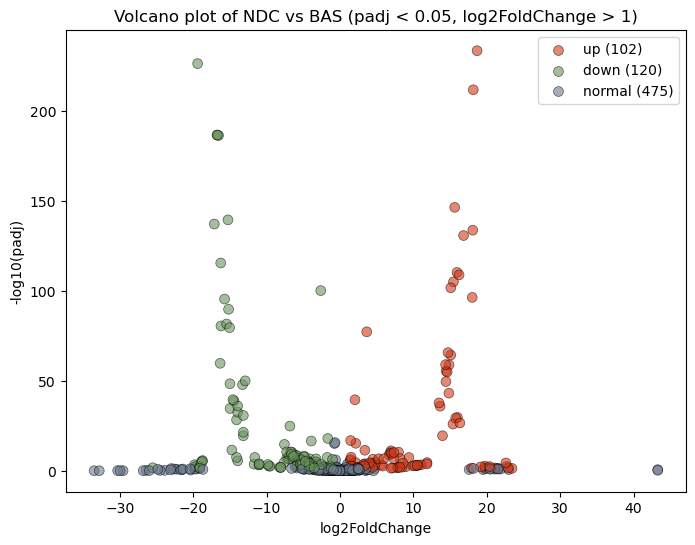

<Axes: title={'center': 'Volcano plot of NDC vs BAS (padj < 0.05, log2FoldChange > 1)'}, xlabel='log2FoldChange', ylabel='-log10(padj)'>

In [13]:
vp = VolcanoPlot()
vp.plot_volcano(df = df_fc, padj=0.05, log2fc=1, title_name='NDC vs BAS', figsize=(8, 6))

- Sankey plot with` width=1200`, `height=800`, `p_value=0.005`, `log2fc=1`

In [16]:
sp = SankeyPlot()
pic = sp.plot_fc_sankey(df_fc, width=1200, height=800, p_value=0.05, log2fc=1.0)
pic.render_notebook()

Creating nodes and links for upregulated...
Number of nodes: 222
Number of links: 224
Creating nodes and links for downregulated...
Number of nodes: 270
Number of links: 276


# 4. Other functions

## 4.1 Get some basic info

- `Input`: a group name 
- `output`: a list containing all samples of the group

In [24]:
sw.get_sample_list_in_a_group('NDC')

['V1_17', 'V2_17', 'V3_17', 'V4_17', 'V5_17']

- `Input`: a meat name 
- `output`: a list containing all groups of the meta

In [28]:
print(sw.get_meta_list('Person'))

['V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V2', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V3', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V4', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5', 'V5

## 4.2 Get intensity matrix

In [29]:
taxon = 'd__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A wexlerae_A'
function = 'Alpha amylase catalytic'

- `Input`: a taxon name 
- `output`: A matrix of all functional intensity under the taxon

In [30]:
sw.get_intensity_matrix(taxon_name=taxon)

V1_01     V1_02  \
Description                                                             
4Fe-4S dicluster domain                                   0   2615194   
ABC transporter substrate binding protein            399325         0   
ABC transporter substrate-binding protein PnrA-...  4801530   8214579   
ABC transporter, solute-binding protein               68697   1926695   
ABC-type branched-chain amino acid transport sy...   142014    388602   
...                                                     ...       ...   
phenylalanyl-tRNA synthetase (beta subunit)          558425   2291605   
precorrin-4 C11-methyltransferase                    614252    772312   
self proteolysis                                    7835853   3782073   
translation elongation factor G                     3437430  22621869   
transport systems ATPase components                  573759    502586   

                                                      V1_03    V1_04    V1_05  \
Description                                                                     
4Fe-4S dicluster domain                              862507        0  1657281   
ABC transporter substrate binding protein                 0   554314        0   
ABC transporter substrate-binding protein PnrA-...  6014136  2932604  8927618   
ABC transporter, solute-binding protein              538352   782061   707150   
ABC-type branched-chain amino acid transport sy...        0        0   233492   
...                                                     ...      ...      ...   
phenylalanyl-tRNA synthetase (beta subunit)         1047544   622633  2117798   
precorrin-4 C11-methyltransferase                         0  1342845   725014   
self proteolysis                                    2542271  6115328  5946785   
translation elongation factor G                     8663979  1737353  8453812   
transport systems ATPase components                  328627   216013   853016   

                                                      V1_06    V1_07    V1_08  \
Description                                                                     
4Fe-4S dicluster domain                                   0        0   202091   
ABC transporter substrate binding protein                 0        0   276083   
ABC transporter substrate-binding protein PnrA-...  5693465  2612510  6079875   
ABC transporter, solute-binding protein              558362   927291   159072   
ABC-type branched-chain amino acid transport sy...        0        0   107147   
...                                                     ...      ...      ...   
phenylalanyl-tRNA synthetase (beta subunit)          215328   201782   444547   
precorrin-4 C11-methyltransferase                    580376        0   846369   
self proteolysis                                    5431637  2889251  3079824   
translation elongation factor G                     2728469  2370272  5187042   
transport systems ATPase components                       0        0   340364   

                                                      V1_09    V1_10  ...  \
Description                                                           ...   
4Fe-4S dicluster domain                                   0   306054  ...   
ABC transporter substrate binding protein            454484   282606  ...   
ABC transporter substrate-binding protein PnrA-...  3840413  7112622  ...   
ABC transporter, solute-binding protein             2955851   894248  ...   
ABC-type branched-chain amino acid transport sy...        0        0  ...   
...                                                     ...      ...  ...   
phenylalanyl-tRNA synthetase (beta subunit)          531796  1047894  ...   
precorrin-4 C11-methyltransferase                   1547419        0  ...   
self proteolysis                                    3154294  7071532  ...   
translation elongation factor G                     3487809  5787783  ...   
transport systems ATPase components                  244512   459331  ..

- `Input`: a function name 
- `output`: A matrix of all species intensity under the function

In [31]:
sw.get_intensity_matrix(func_name=function)

V1_01     V1_02  \
Taxon                                                                   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0   1695192   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   619484   2817471   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  3571092  15314463   

                                                      V1_03    V1_04  \
Taxon                                                                  
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   710294   504574   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  4256180  3090474   

                                                       V1_05    V1_06  \
Taxon                                                                   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   1625777        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   2518867   462228   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  14250829  3958464   

                                                      V1_07    V1_08    V1_09  \
Taxon                                                                           
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   538816   302569   341525   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  2138617  5030109  3282561   

                                                      V1_10  ...    V5_29  \
Taxon                                                        ...            
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0  ...        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   600846  ...   255284   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  3785770  ...  5417808   

                                                      V5_30    V5_31  \
Taxon                                                                  
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1477560  5192762   

                                                       V5_32    V5_33  \
Taxon                                                                   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...         0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3601729        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  67409590  6813235   

                                                      V5_34    V5_35    V5_36  \
Taxon                                                                           
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   104086        0        0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  3972182  2838313  3006783   

                                                      V5_37    V5_38  
Taxon                                                                 
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0  
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...        0        0  
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  2426268  3675044  

[3 rows x 190 columns]

- `Input`: a taxon name and function name 
- `output`: A matrix of all peptides intensity under the taxa-func

In [32]:
sw.get_intensity_matrix(taxon_name=taxon, func_name=function)

V1_01    V1_02    V1_03  \
Sequence                                                                       
ALNNADTITVGEC(Carbamidomethyl)SGVTLEEAKK                 0        0        0   
ALPMHDYEPDREDGLC(Carbamidomethyl)SIR                     0   618606        0   
DQINREDSVFK                                         260958   354036        0   
EGELPTNWR                                           372353  2665658   759794   
IMMDLVVNHTSDEHK                                          0   412916  1035354   
INAKDQINREDSVFK                                     505599   714323   830983   
KSTDNPYR                                            309908   602749        0   
MQWTDGENAGFTTGKPWLK                                 376350  1181448        0   
MTEEDMMAAIGYK                                            0   435420        0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLN(Dea...       0   248153        0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLNGITGK         0        0        0   
SFC(Carbamidomethyl)DSNGDGIGDLN(Deamidated)GITGK         0        0        0   
SFC(Carbamidomethyl)DSNGDGIGDLNGITGK                     0   648961        0   
TLLVVGNYQKEPQTIELAGEC(Carbamidomethyl)R                  0        0        0   
TPMQWTDGENAGFTTGKPWLK                               378120   558761        0   
VLISNYI(Xle->Ser)DAK                                688196  4111870   391997   
VLISNYIDAK                                               0        0   461146   
VNANYTK                                             679608  2761562   776906   

                                                     V1_04    V1_05   V1_06  \
Sequence                                                                      
ALNNADTITVGEC(Carbamidomethyl)SGVTLEEAKK                 0        0       0   
ALPMHDYEPDREDGLC(Carbamidomethyl)SIR                     0   385705       0   
DQINREDSVFK                                              0   825274  362460   
EGELPTNWR                                           520188  2560633  680107   
IMMDLVVNHTSDEHK                                     613620   943625       0   
INAKDQINREDSVFK                                     782399   722507  868311   
KSTDNPYR                                            296602   514596  289842   
MQWTDGENAGFTTGKPWLK                                      0   944313       0   
MTEEDMMAAIGYK                                            0   626554       0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLN(Dea...       0        0       0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLNGITGK         0        0       0   
SFC(Carbamidomethyl)DSNGDGIGDLN(Deamidated)GITGK         0        0       0   
SFC(Carbamidomethyl)DSNGDGIGDLNGITGK                     0   484536       0   
TLLVVGNYQKEPQTIELAGEC(Carbamidomethyl)R                  0        0       0   
TPMQWTDGENAGFTTGKPWLK                               287484   474311       0   
VLISNYI(Xle->Ser)DAK                                     0  3039805  874560   
VLISNYIDAK                                               0   646190       0   
VNANYTK                                             590181  2082780  883184   

                                                     V1_07    V1_08    V1_09  \
Sequence                                                                       
ALNNADTITVGEC(Carbamidomethyl)SGVTLEEAKK                 0        0        0   
ALPMHDYEPDREDGLC(Carbamidomethyl)SIR                     0   138603        0   
DQINREDSVFK                                              0   130755        0   
EGELPTNWR                                                0   867148   336808   
IMMDLVVNHTSDEHK                                     383944   762730   538389   
INAKDQINREDSVFK                                     763122   426687   716517   
KSTDNPYR                                            231717   164608        0   
MQWTDGENAGFTTGKPWLK                                      0        0        0   
MTEEDMMAAIGYK                                            0        0    

- Output only the groups we care about

In [33]:
sw.get_intensity_matrix(taxon_name=taxon, func_name=function, groups=['MAL', 'PBS'])

V1_32    V2_32  \
Sequence                                                               
ALNNADTITVGEC(Carbamidomethyl)SGVTLEEAKK             434741   417616   
ALPMHDYEPDREDGLC(Carbamidomethyl)SIR                 337218   609524   
DQINREDSVFK                                          981283        0   
EGELPTNWR                                           3160785  1456018   
IMMDLVVNHTSDEHK                                     1278639  1278804   
INAKDQINREDSVFK                                      945226   480514   
KSTDNPYR                                             616553  1196118   
MQWTDGENAGFTTGKPWLK                                  863779   601707   
MTEEDMMAAIGYK                                        636212  3450194   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLN(Dea...   475946  1018241   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLNGITGK     832444  1000680   
SFC(Carbamidomethyl)DSNGDGIGDLN(Deamidated)GITGK     666817  1009803   
SFC(Carbamidomethyl)DSNGDGIGDLNGITGK                 492400  1021262   
TLLVVGNYQKEPQTIELAGEC(Carbamidomethyl)R                   0   667588   
TPMQWTDGENAGFTTGKPWLK                                     0   518267   
VLISNYI(Xle->Ser)DAK                                4384464  9780422   
VLISNYIDAK                                          1859258   848574   
VNANYTK                                             2350871  2596435   

                                                       V3_32    V4_32  \
Sequence                                                                
ALNNADTITVGEC(Carbamidomethyl)SGVTLEEAKK             1387643   695346   
ALPMHDYEPDREDGLC(Carbamidomethyl)SIR                  832618   612271   
DQINREDSVFK                                          2455104  1620138   
EGELPTNWR                                            4665067  3019300   
IMMDLVVNHTSDEHK                                      1871439  1295025   
INAKDQINREDSVFK                                       667388   735779   
KSTDNPYR                                              744606   346441   
MQWTDGENAGFTTGKPWLK                                  1544428  1251519   
MTEEDMMAAIGYK                                        2791486  2246693   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLN(Dea...    677051        0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLNGITGK     1273125   931489   
SFC(Carbamidomethyl)DSNGDGIGDLN(Deamidated)GITGK     1126245  1114940   
SFC(Carbamidomethyl)DSNGDGIGDLNGITGK                 1058611  2188407   
TLLVVGNYQKEPQTIELAGEC(Carbamidomethyl)R               894714   681946   
TPMQWTDGENAGFTTGKPWLK                                1062874   374322   
VLISNYI(Xle->Ser)DAK                                17734368  4625617   
VLISNYIDAK                                            307211  4400783   
VNANYTK                                              4554566  2852711   

                                                       V5_32   V1_01   V1_26  \
Sequence                                                                       
ALNNADTITVGEC(Carbamidomethyl)SGVTLEEAKK             1315398       0       0   
ALPMHDYEPDREDGLC(Carbamidomethyl)SIR                 1422385       0  203204   
DQINREDSVFK                                          6929513  260958  144356   
EGELPTNWR                                            5300408  372353  728259   
IMMDLVVNHTSDEHK                                      2511732       0  883181   
INAKDQINREDSVFK                                      2478282  505599  544242   
KSTDNPYR                                              809794  309908  179245   
MQWTDGENAGFTTGKPWLK                                  1704527  376350  291765   
MTEEDMMAAIGYK                                        7823039       0       0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLN(Dea...   1117332       0       0   
SFC(Carbamidomethyl)DSN(Deamidated)GDGIGDLNGITGK     2134871       0       0   
SFC(Carbamidomethyl)DSNGDGIGDLN(Deamidated)GITGK     2355751       0       0   
SFC(Carbamidomethyl)DSNGDGIGDLNG

## 4.3 Get top intensity matrix of test results ('anova', 'ttest' or 'log2fc')

-  Top 10 intensity matrix of T-test results

In [34]:
sw.get_top_intensity_matrix_of_test_res(df_ttest, df_type='ttest', top_num=10)

V1_32     V2_32  \
Taxa-Func                                                                
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3405147   2031408   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  10544927   7925416   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   4024996   2184018   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  55357633  38368403   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  33008066  62835342   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    673700    922783   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3287917   2910844   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   2012315   2331128   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   6624441   5728486   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   2979891   2552639   

                                                       V3_32     V4_32  \
Taxa-Func                                                                
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3890510   3174528   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  12979505   8669368   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   2897185   3198223   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  69739326  37982563   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  53925379  41611821   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    865928    576781   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   5938048   2417397   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   4225992   4520725   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  13980073   7957624   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   5769546   2785415   

                                                       V5_32     V1_01  \
Taxa-Func                                                                
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3735839    495699   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  10268308   2376259   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3172044    467096   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  64018487  10357237   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  70276260  16946312   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   1037950    467309   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3601729    619484   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   5936002    383915   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  12377792    818545   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   6061225    573312   

                                                       V1_26     V1_37  \
Taxa-Func                                                                
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    618303         0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   2298544   2032377   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...         0    290105   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   5822630   9279453   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  16233511  10743316   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    194477     78400   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    255115    374653   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...         0         0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   1213816    792025   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...     81611    410258   

                                                       V2_01     V2_26  \
Taxa-Func                                                                
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    547513    660347   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   3984972   3559154   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   1289805    271961   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   9944561  10069509   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  142

## 4.4 Plot intensity heatmap

- Plot a intensity heatmap of a function
- All sample names are automatically added to the grouping information in parentheses
- Different colors represent different groups

Table size: 3 x 190
Recommended figure size: width: 40, length: 12, front_title: 20, font_size: 10


<Figure size 4000x1200 with 0 Axes>

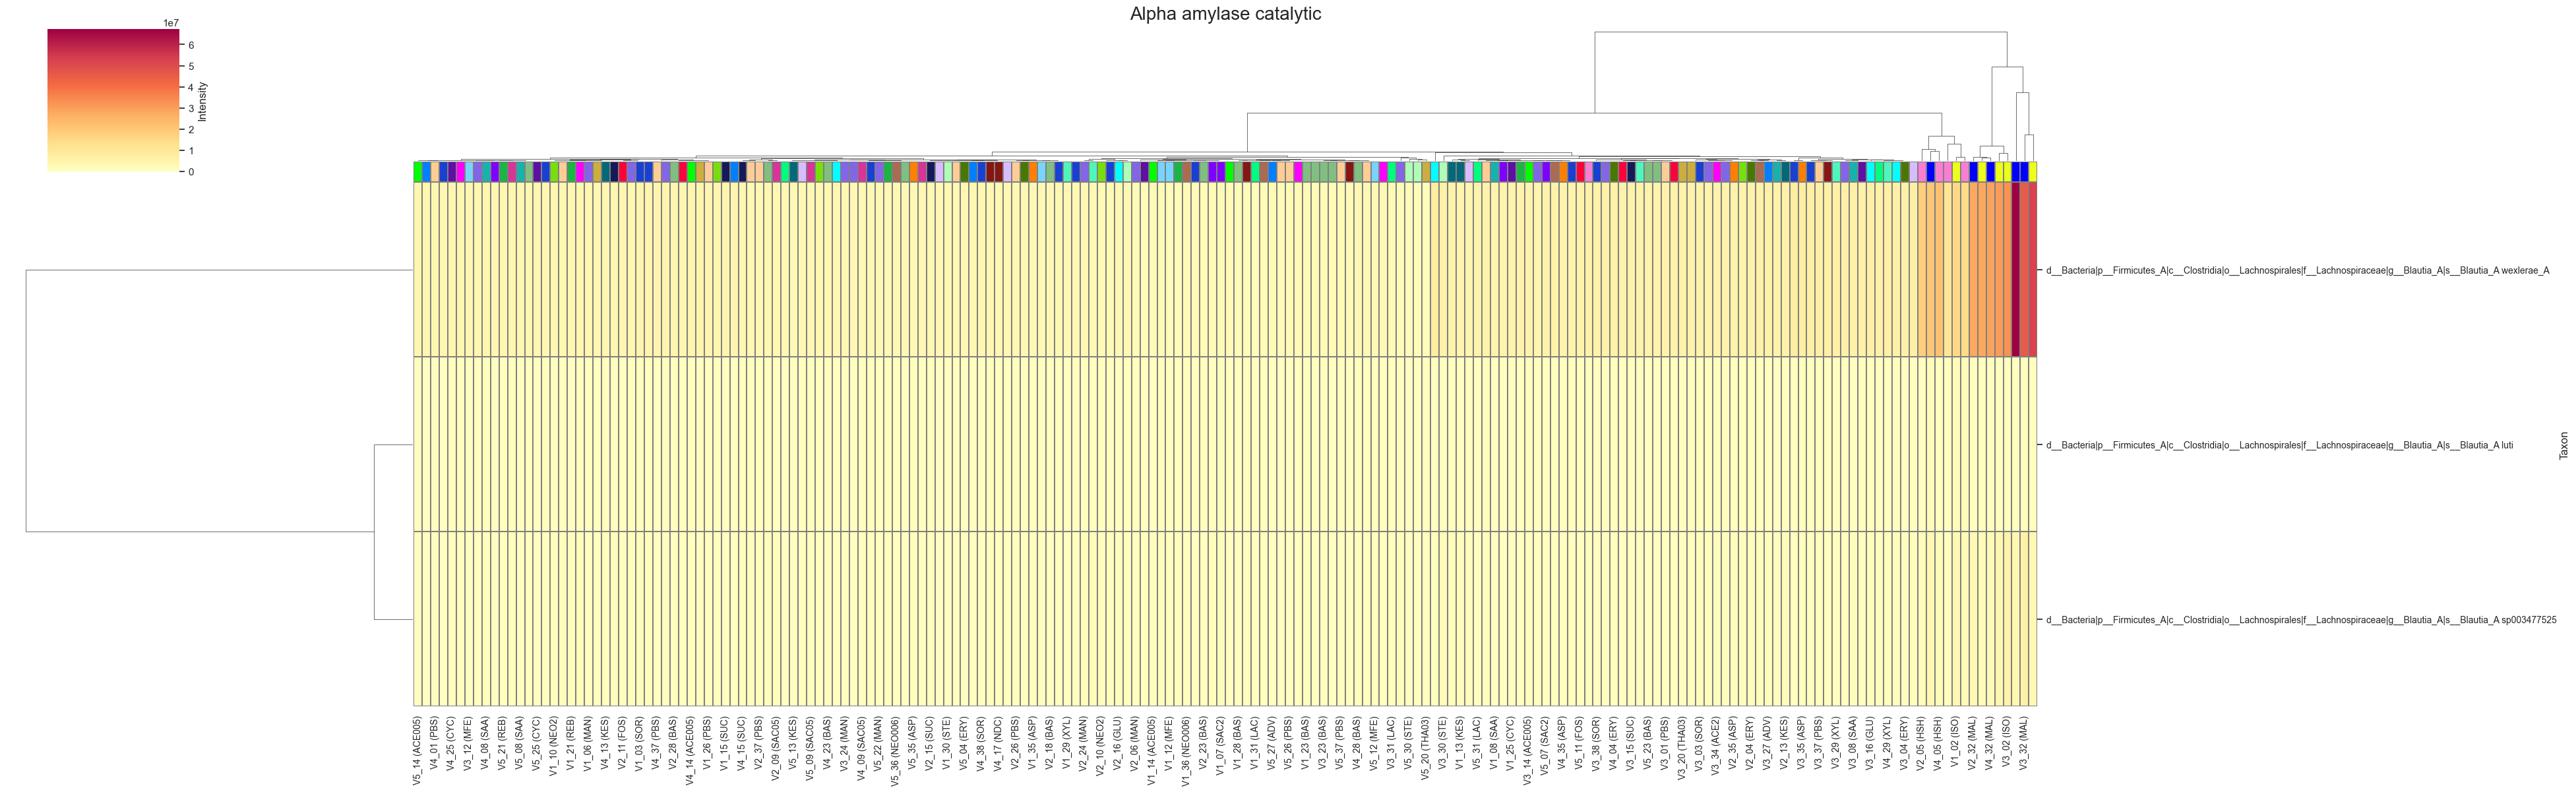

In [36]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(func_name=function), title='Alpha amylase catalytic')

- Plot a intensity heatmap of a taxa-func


Table size: 18 x 190
Recommended figure size: width: 40, length: 14.0, front_title: 20, font_size: 10


<Figure size 4000x1400 with 0 Axes>

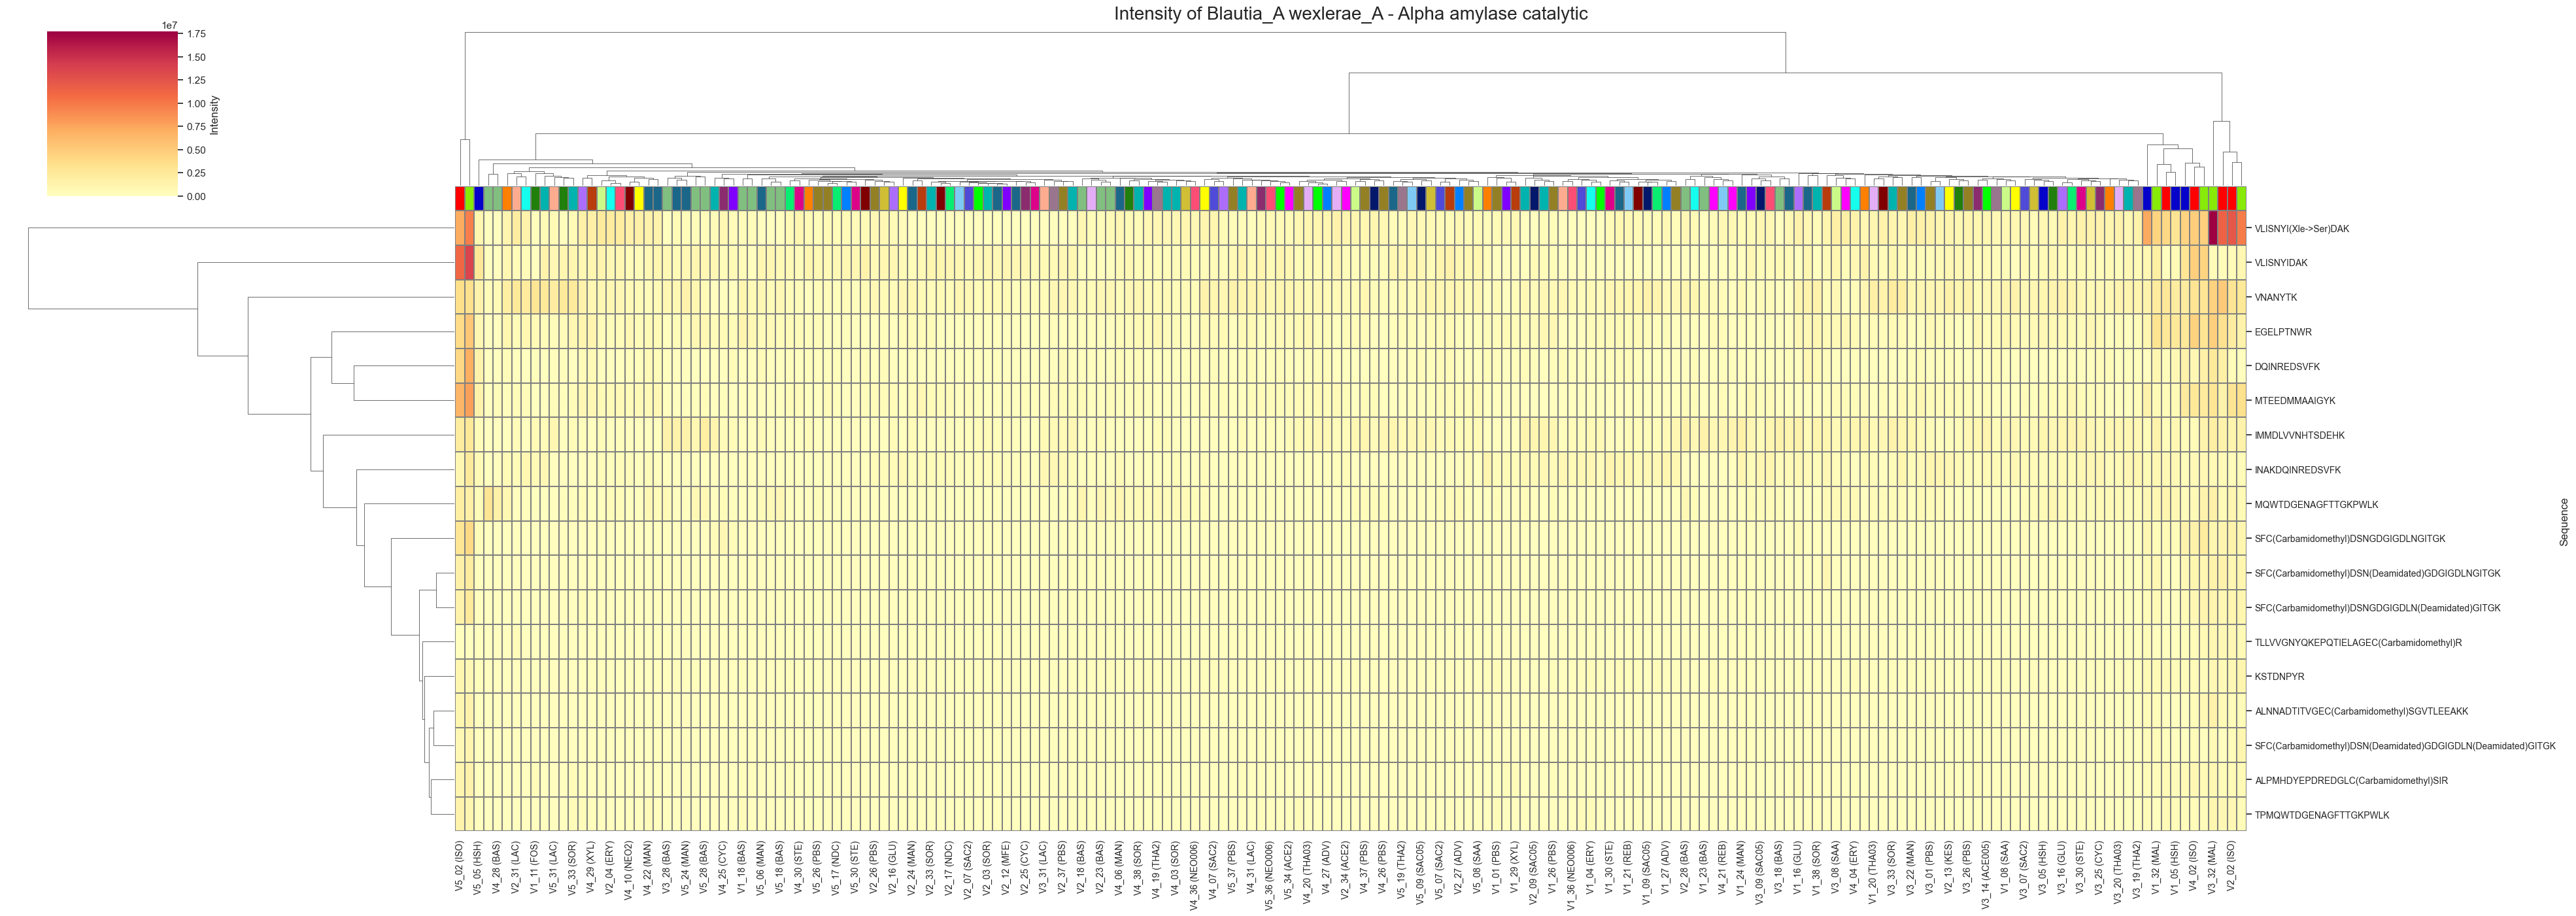

In [38]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(taxon_name=taxon,func_name=function ), title='Intensity of Blautia_A wexlerae_A - Alpha amylase catalytic')

- Plot a intensity heatmap of a function of `some groups` we care


Table size: 3 x 20
Recommended figure size: width: 25, length: 12, front_title: 15, font_size: 10


<Figure size 2500x1200 with 0 Axes>

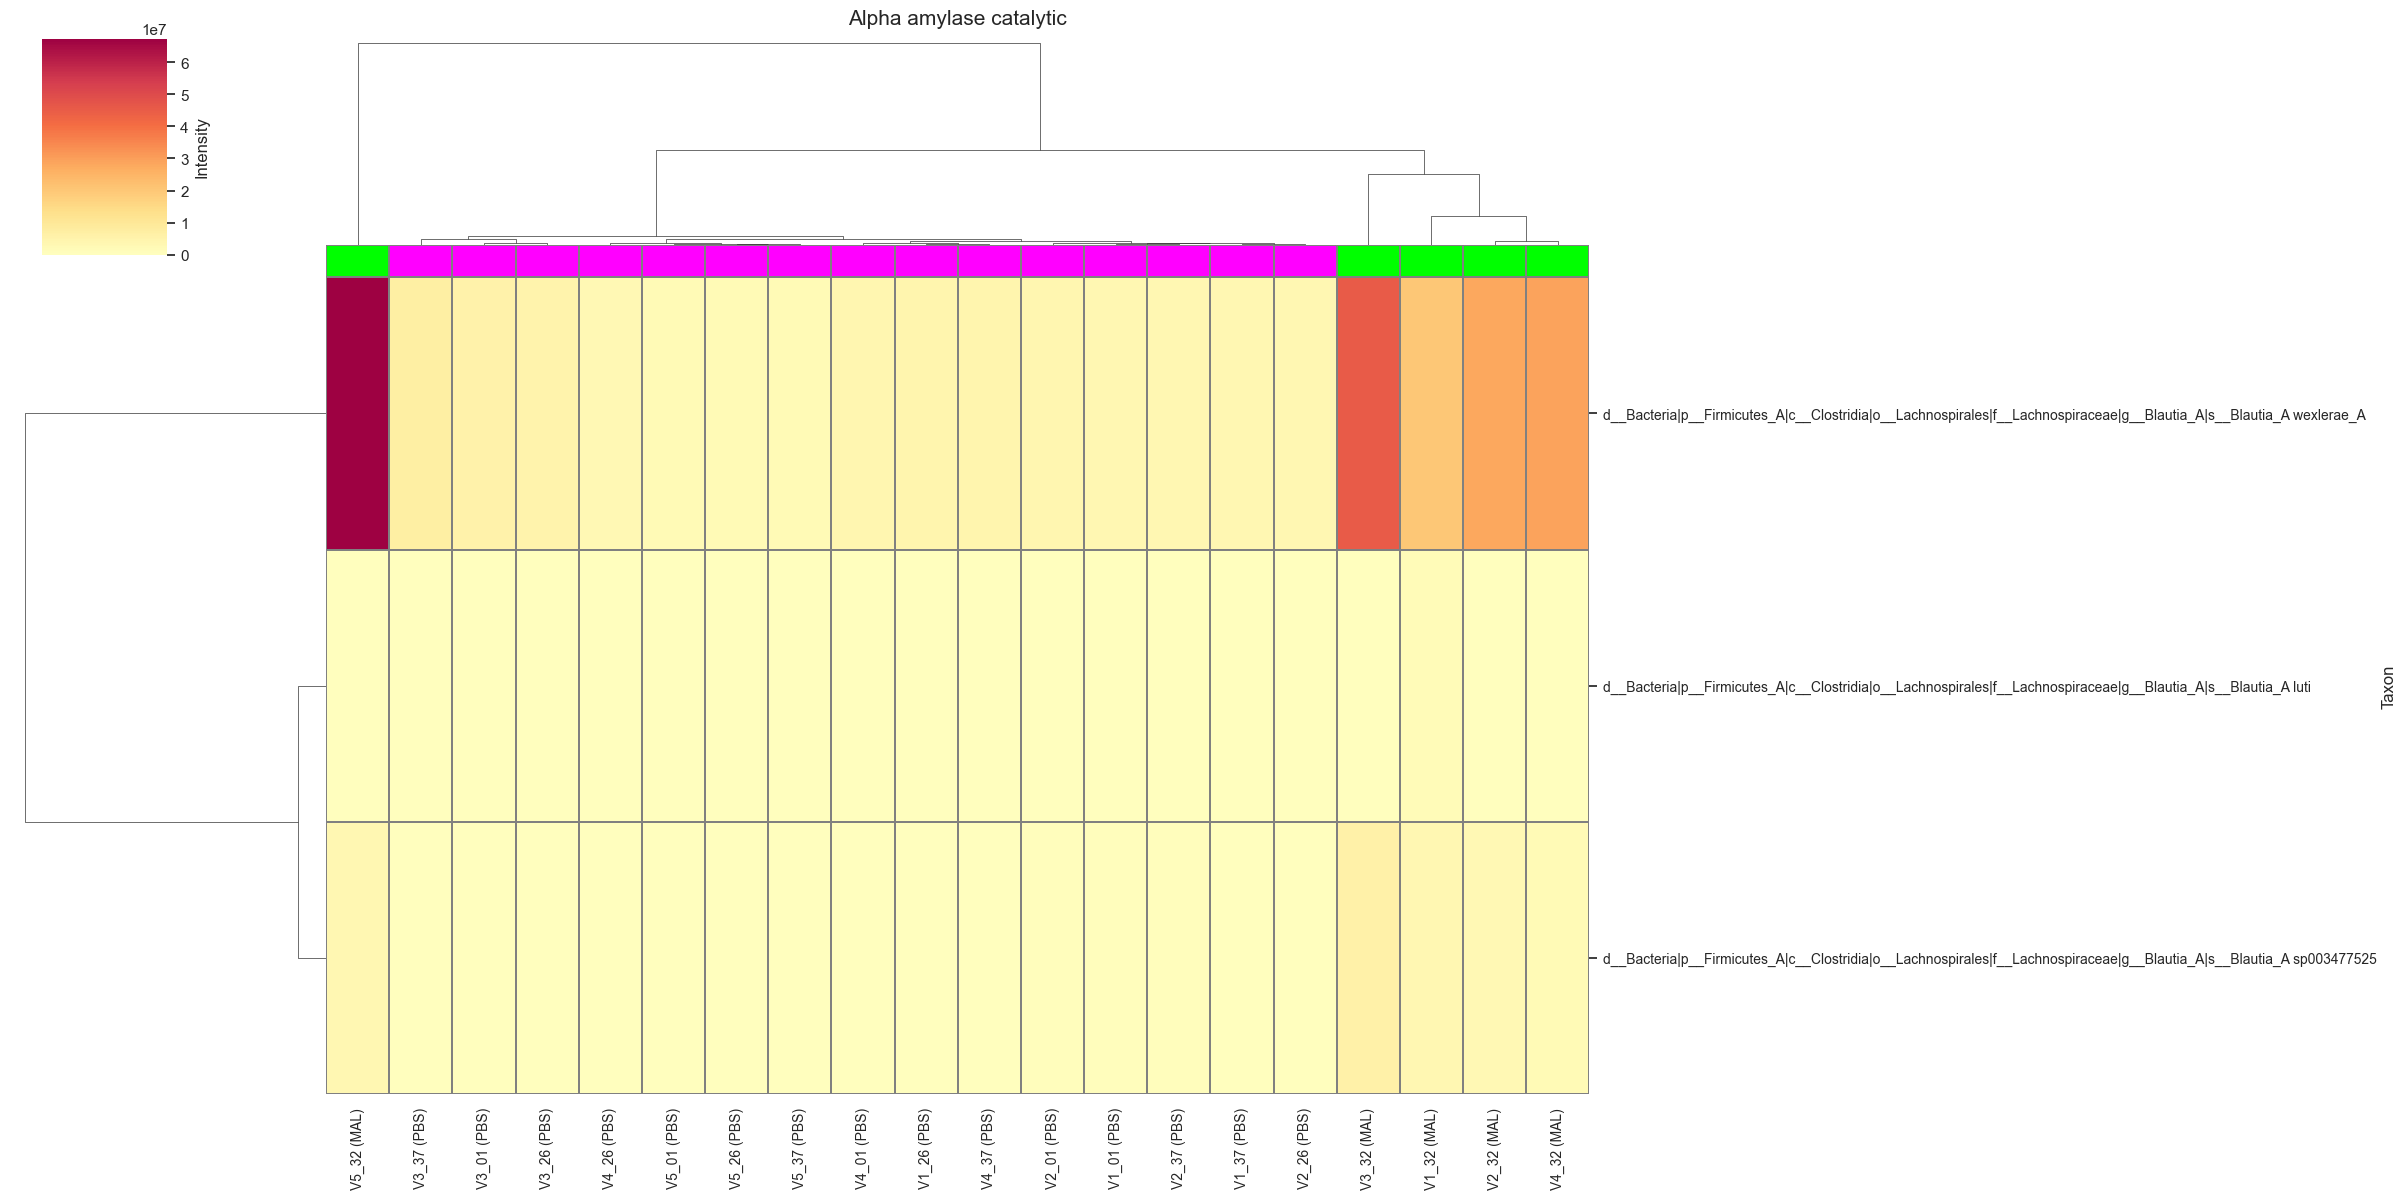

In [37]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(func_name=function, groups=['MAL', 'PBS'] ), title='Alpha amylase catalytic')

- Plot a intensity heatmap of a taxa-func of `some groups`

Table size: 18 x 20
Recommended figure size: width: 25, length: 14.0, front_title: 15, font_size: 10


<Figure size 2500x1400 with 0 Axes>

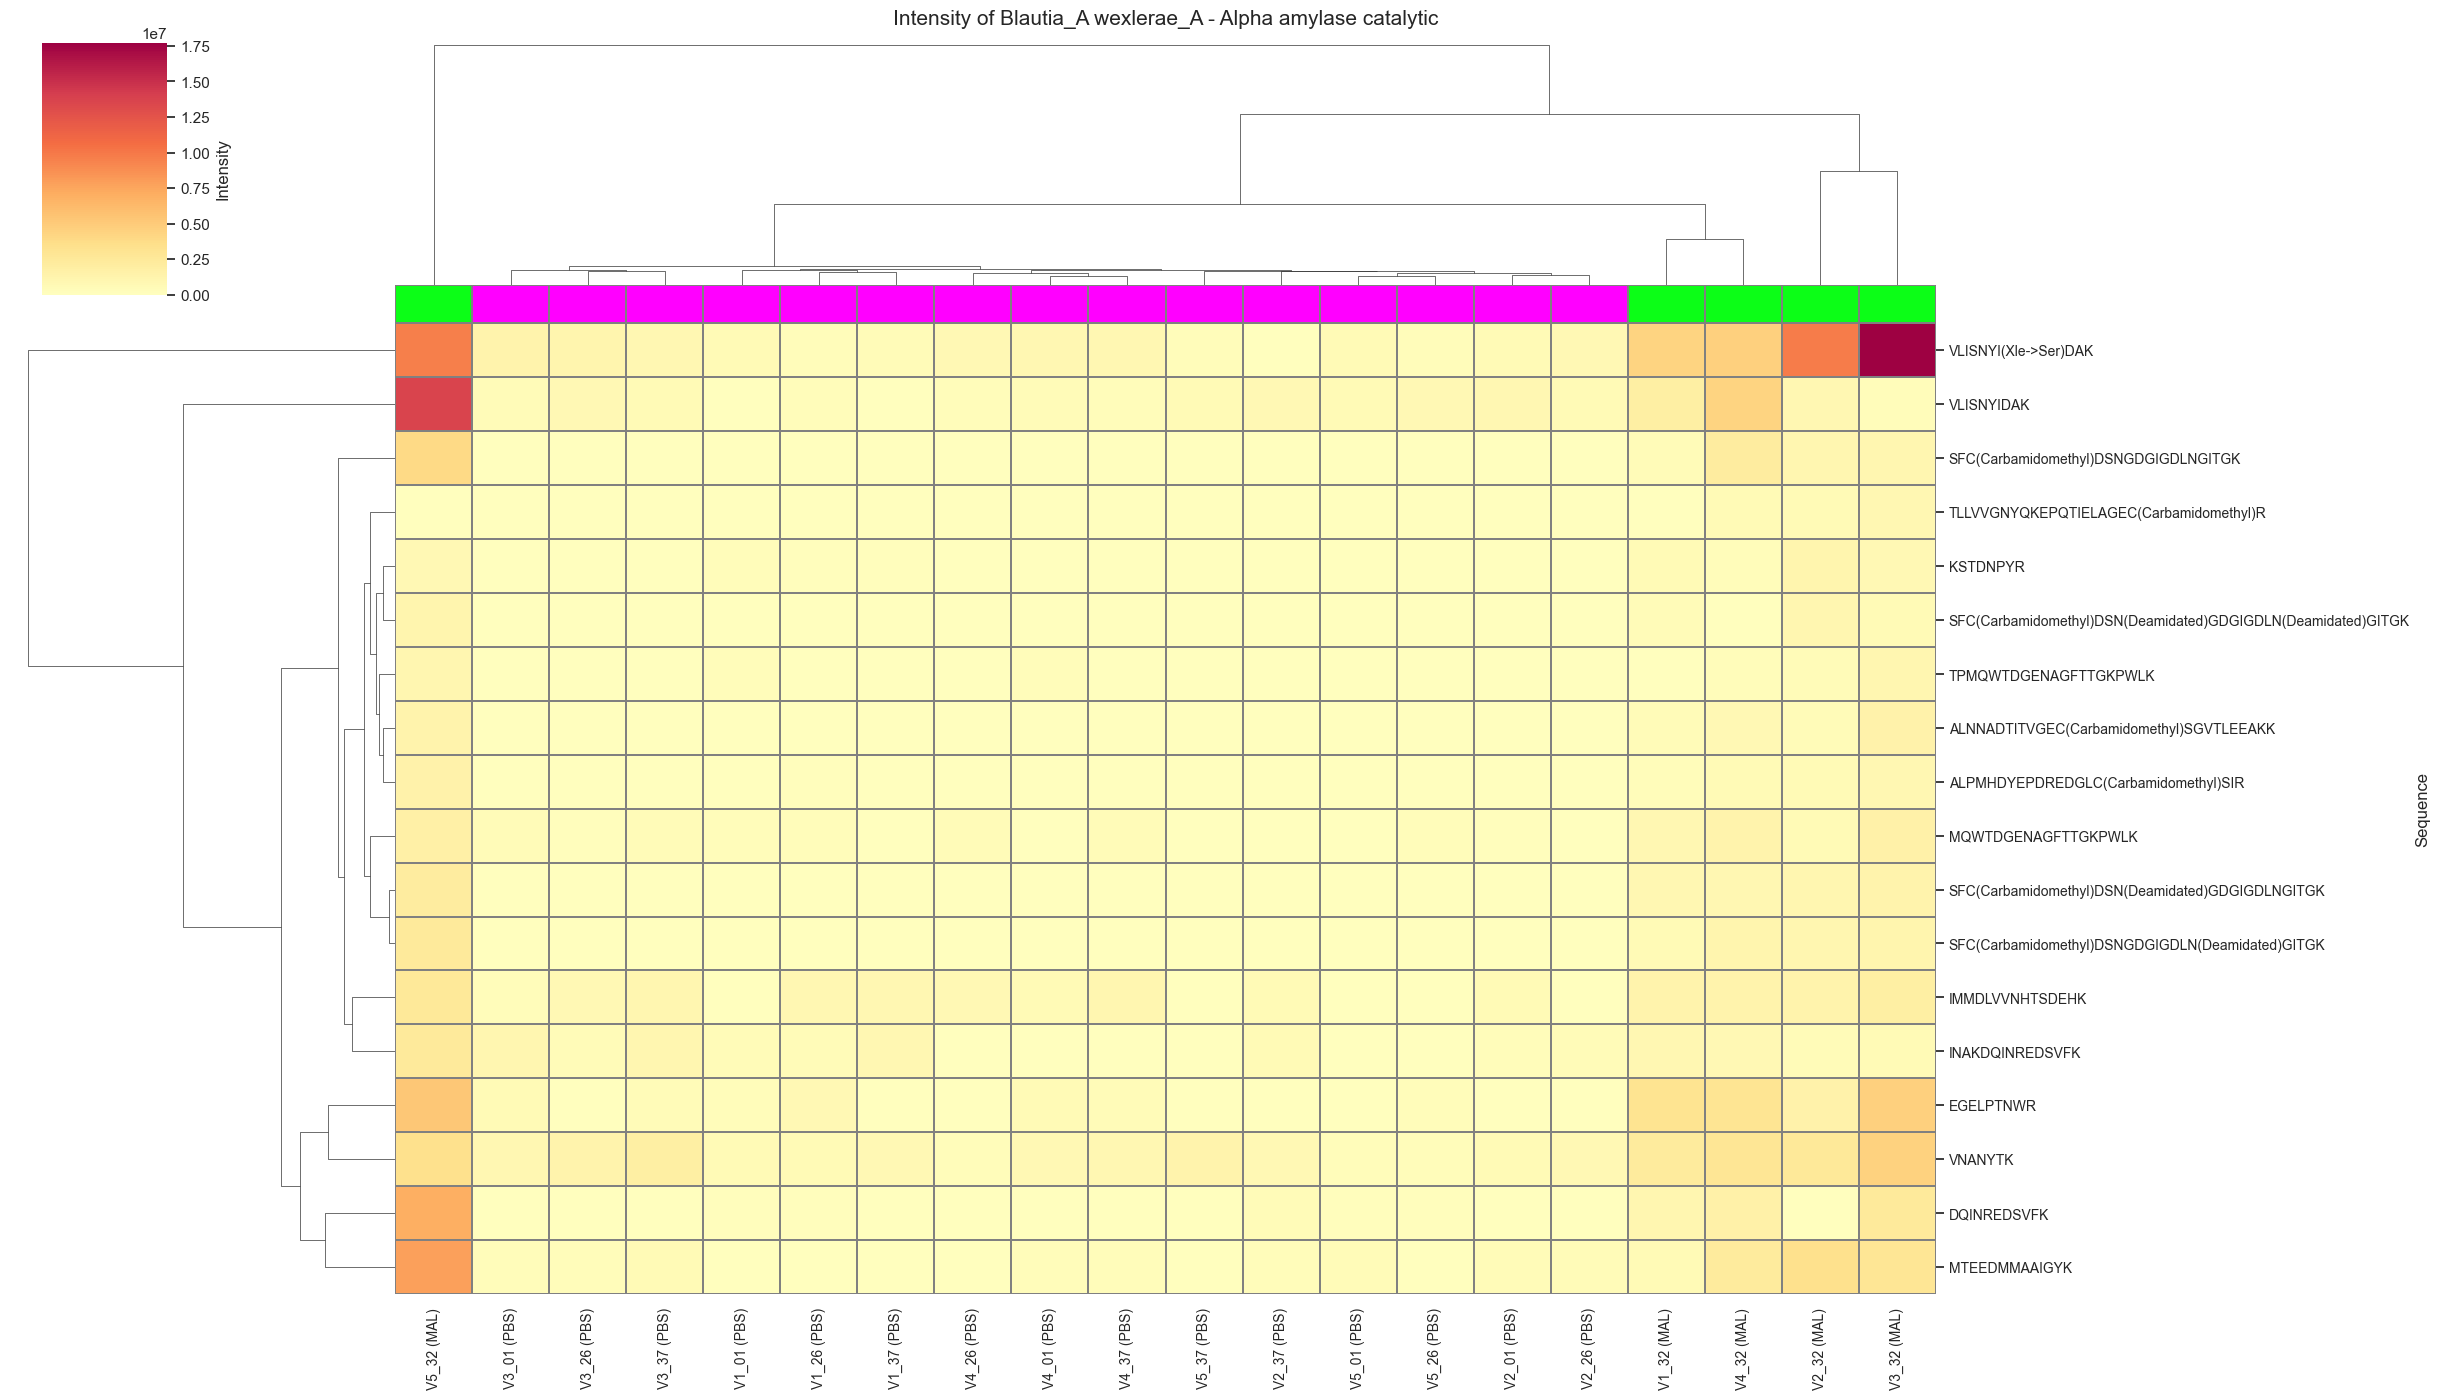

In [39]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(taxon_name=taxon,func_name=function, groups=['MAL', 'PBS'] ), title='Intensity of Blautia_A wexlerae_A - Alpha amylase catalytic')


## 4.5 Line plot of intensity

- plot line of intensity of different samples

<Axes: title={'center': 'Alpha amylase catalytic'}, xlabel='Samples', ylabel='Intensity'>

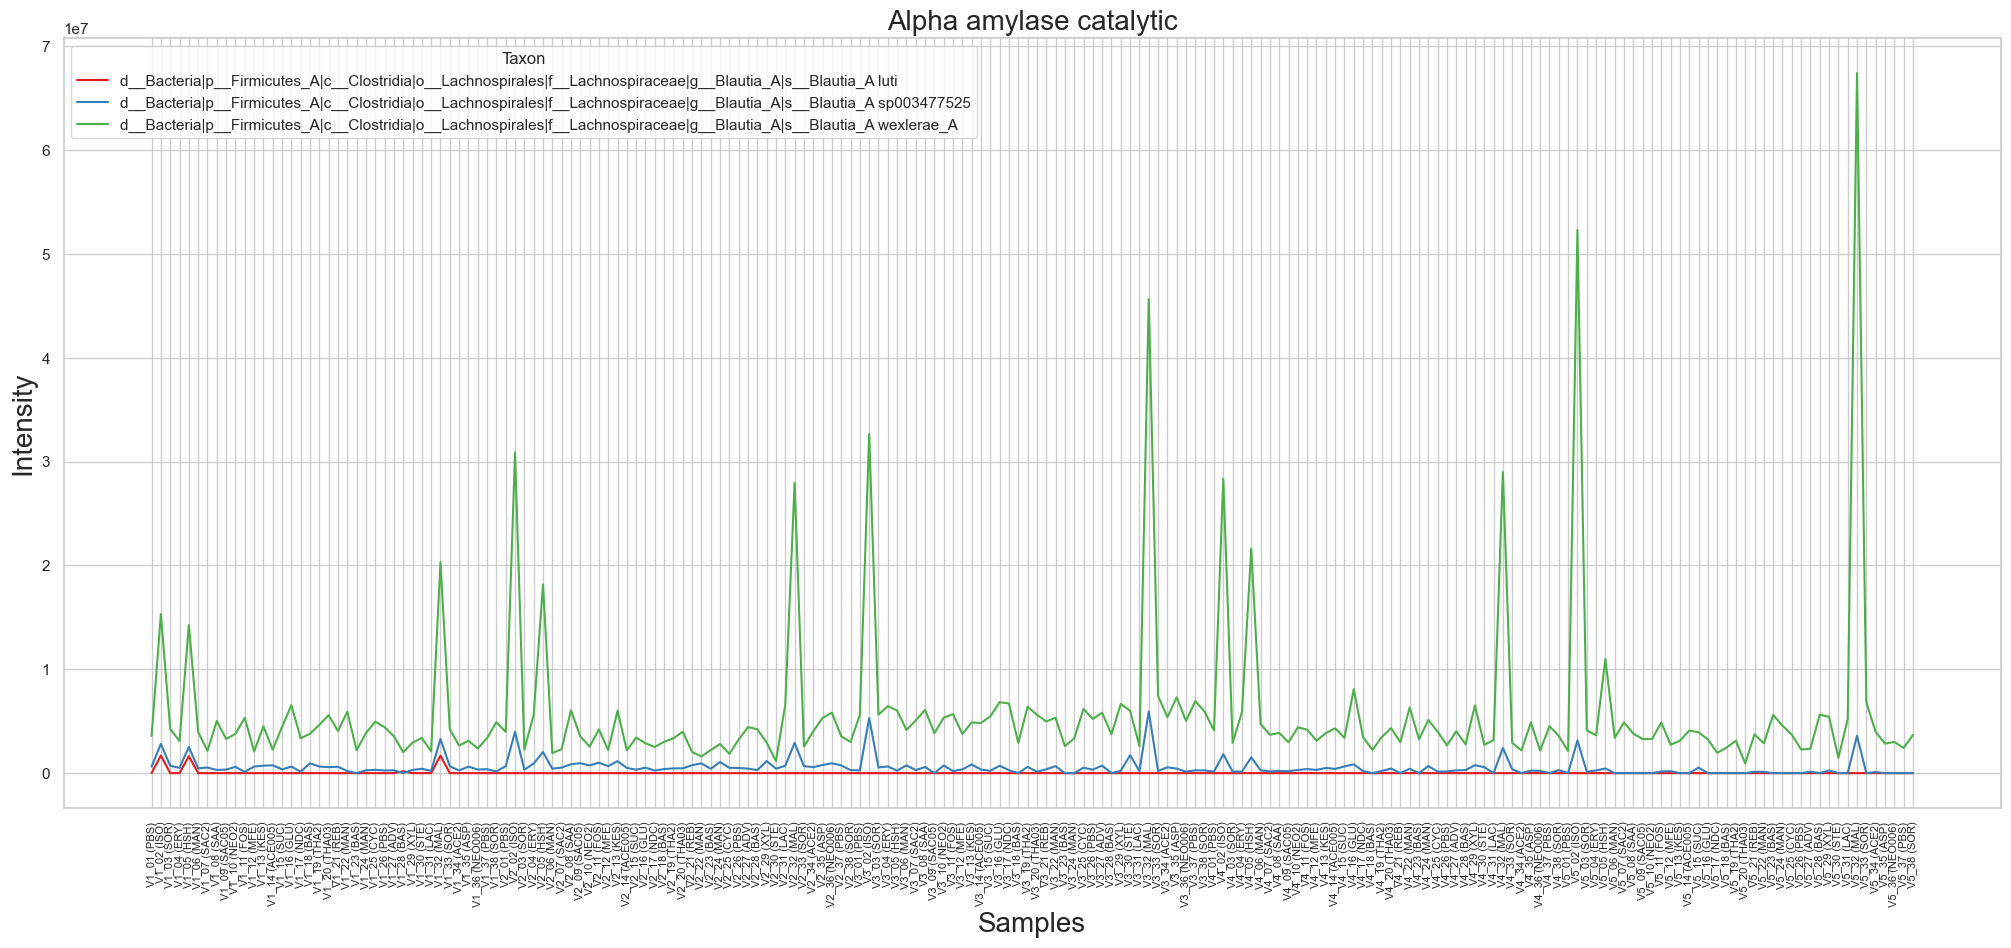

In [50]:
lp = LinePlot(sw)
lp.plot_intensity_line(func_name=function, fig_size=(25, 10))

<Axes: title={'center': 'd__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A wexlerae_A\nAlpha amylase catalytic'}, xlabel='Samples', ylabel='Intensity'>

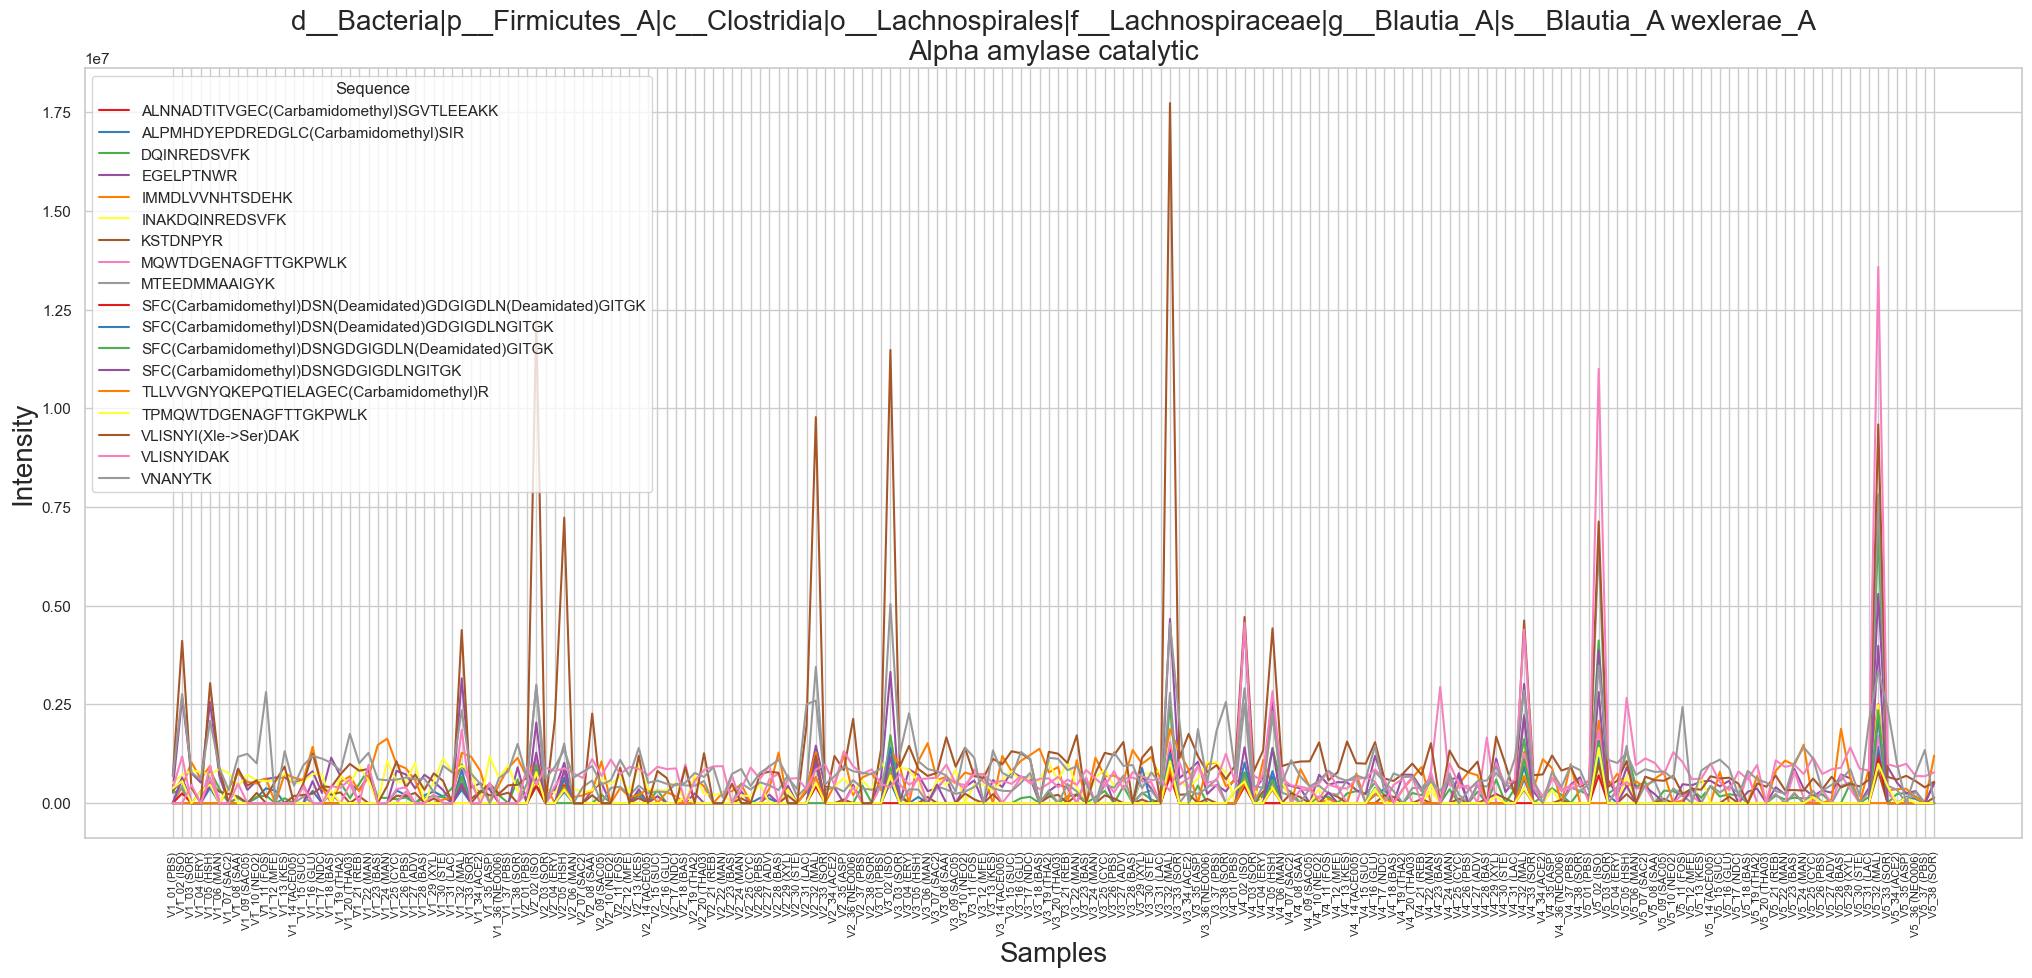

In [51]:
lp.plot_intensity_line(taxon_name=taxon,func_name=function, fig_size=(25,10))